In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Prepro_data.csv')

In [3]:
import numpy as np
import nltk
import string
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [4]:
def load_data():
    data = pd.read_csv('Prepro_data.csv')
    return data

tweet_df = load_data()
df = pd.DataFrame(tweet_df[['Username','Text','Label']])
df.head(5)

Username                                               Text    Label
0     IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...  Negatif
1  juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...  Negatif
2   Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...  Negatif
3         arshann  b'Bingung mau ganti internet di rumah pake apa...  Negatif
4       meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...  Negatif

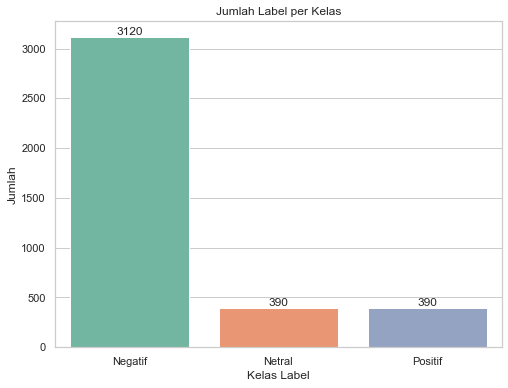

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah label untuk setiap kelas
label_counts = df['Label'].value_counts()

# Membuat countplot
sns.set(style="whitegrid")  # Mengatur gaya plot
plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
sns.countplot(x='Label', data=df, palette="Set2")  # Membuat countplot dengan palet warna

# Menambahkan label pada sumbu
plt.xlabel('Kelas Label')
plt.ylabel('Jumlah')

# Menampilkan nilai jumlah di atas setiap batang bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.title('Jumlah Label per Kelas')
plt.show()

In [6]:
def remove_pattern(tweet, pattern):
    r = re.findall(pattern, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

**Proses Cleansing**

In [7]:
def cleansing(tweet):
    #menghilangkan angka
    tweet = re.sub('[0-9]+', '', tweet)
    #menghilangkan username
    tweet = re.sub('@[\w]*', '', tweet)
    #menghilangkan hashtag
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)
    #menghilangkan hyperlink
    tweet = re.sub(r'http\S+', '', tweet)
    #menghapus .com atau domain lain
    tweet = re.sub(r'[\S]+\.(net|com|org|gov|id|co|COM|ID)[\S]*\s?', '',tweet)
    #menghapus kata kata yang terdiri dari hanya 1 atau 2 karakter 
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # menghapus "b " dan spasi yang mengikutinya di awal baris teks
    tweet = re.sub(r'^b[\s]+', '', tweet)
    #menghilangkan tanda baca tertentu
    tweet = re.sub(r'[,-/]',' ',tweet)
    #menghilangkan tanda baca
    tweet = remove_punct(tweet)
    #menghapus karakter newline
    tweet = re.sub('\n ', '', tweet)
    #menghapus kata yang hanya terdiri dari satu huruf
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))
    #menghapus karakter selain huruf dan angka
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))
    # Mengganti spasi berlebihan menjadi satu spasi saja
    tweet = re.sub('\s+', ' ', tweet)
    #menghilangkan karakter tertentu
    tweet = re.sub(r'xaa', '', tweet)
    tweet = re.sub(r'xab', '', tweet)
    tweet = re.sub(r'xad', '', tweet)
    tweet = re.sub(r'xba', '', tweet)
    tweet = re.sub(r'xac', '', tweet)
    tweet = re.sub(r'xbb', '', tweet)
    tweet = re.sub(r'xbc', '', tweet)
    tweet = re.sub(r'xbd', '', tweet)
    tweet = re.sub(r'xbe', '', tweet)
    tweet = re.sub(r'xbf', '', tweet)
    tweet = re.sub(r'xef', '', tweet)
    tweet = re.sub(r'&amp;', '', str(tweet))
    
    return tweet

#fungsi untuk menghilangkan tanda baca
def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['Cleaning'] = df['Text'].apply(lambda x:cleansing(x))
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...  
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...  
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...  
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...  
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...  
...        ...                                                ...  
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...  
26291      NaN                              Sinyal telkomsel kek   
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...  
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...  
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...  

[26295 rows x 4 columns]

**Proses CaseFolding**

In [8]:
df['CaseFolding'] = df['Cleaning'].str.lower()
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  \
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...   
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...   
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...   
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...   
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   
...        ...                                                ...   
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...   
26291      NaN                              Sinyal telkomsel kek    
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...   
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...   

                                             CaseFolding  
0       tahu tower punya siapa yang roboh dari jaman ...  
1       yang make jaringan telkomsel pekanbaru aja ud...  
2      kepada yang terhormat jaringan telkomsel yang ...  
3      bingung mau ganti internet rumah pake apaan cu...  
4      akhirnya finish setelah emosi sama sinyal telk...  
...                                                  ...  
26290  kalian ngerasa jaringan telkomsel minggu ini m...  
26291                              sinyal telkomsel kek   
26292  jam jam dimana sinyal telkomsel amp tdk sebera...  
26293  yah yah jaringan telkomsel indihome kok gini b...  
26294   ini jaringan telkomsel kenapa juga sama kayak...  

[26295 rows x 5 columns]

**Proses Tokenization**

In [9]:
from nltk.tokenize import word_tokenize 

In [10]:
def tokenisasi(tweet):
    return word_tokenize(tweet)

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MFarchanF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['Tokenization'] = df['CaseFolding'].apply(lambda x:tokenisasi(x))
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  \
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...   
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...   
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...   
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...   
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   
...        ...                                                ...   
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...   
26291      NaN                              Sinyal telkomsel kek    
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...   
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...   

                                             CaseFolding  \
0       tahu tower punya siapa yang roboh dari jaman ...   
1       yang make jaringan telkomsel pekanbaru aja ud...   
2      kepada yang terhormat jaringan telkomsel yang ...   
3      bingung mau ganti internet rumah pake apaan cu...   
4      akhirnya finish setelah emosi sama sinyal telk...   
...                                                  ...   
26290  kalian ngerasa jaringan telkomsel minggu ini m...   
26291                              sinyal telkomsel kek    
26292  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293  yah yah jaringan telkomsel indihome kok gini b...   
26294   ini jaringan telkomsel kenapa juga sama kayak...   

                                            Tokenization  
0      [tahu, tower, punya, siapa, yang, roboh, dari,...  
1      [yang, make, jaringan, telkomsel, pekanbaru, a...  
2      [kepada, yang, terhormat, jaringan, telkomsel,...  
3      [bingung, mau, ganti, internet, rumah, pake, a...  
4      [akhirnya, finish, setelah, emosi, sama, sinya...  
...                                                  ...  
26290  [kalian, ngerasa, jaringan, telkomsel, minggu,...  
26291                           [sinyal, telkomsel, kek]  
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tdk...  
26293  [yah, yah, jaringan, telkomsel, indihome, kok,...  
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...  

[26295 rows x 6 columns]

**Proses Menyaring Slangword**

In [13]:
kamus_slangword = pd.read_csv("Kamus_Slangwords.csv")
kata_normalisasi_dict = {}

for index, row in kamus_slangword.iterrows():
    if row[0] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row[0]] = row[1]

def Slangword(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

df['Slangword'] = df['Tokenization'].apply(lambda x:Slangword(x))
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  \
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...   
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...   
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...   
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...   
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   
...        ...                                                ...   
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...   
26291      NaN                              Sinyal telkomsel kek    
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...   
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...   

                                             CaseFolding  \
0       tahu tower punya siapa yang roboh dari jaman ...   
1       yang make jaringan telkomsel pekanbaru aja ud...   
2      kepada yang terhormat jaringan telkomsel yang ...   
3      bingung mau ganti internet rumah pake apaan cu...   
4      akhirnya finish setelah emosi sama sinyal telk...   
...                                                  ...   
26290  kalian ngerasa jaringan telkomsel minggu ini m...   
26291                              sinyal telkomsel kek    
26292  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293  yah yah jaringan telkomsel indihome kok gini b...   
26294   ini jaringan telkomsel kenapa juga sama kayak...   

                                            Tokenization  \
0      [tahu, tower, punya, siapa, yang, roboh, dari,...   
1      [yang, make, jaringan, telkomsel, pekanbaru, a...   
2      [kepada, yang, terhormat, jaringan, telkomsel,...   
3      [bingung, mau, ganti, internet, rumah, pake, a...   
4      [akhirnya, finish, setelah, emosi, sama, sinya...   
...                                                  ...   
26290  [kalian, ngerasa, jaringan, telkomsel, minggu,...   
26291                           [sinyal, telkomsel, kek]   
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tdk...   
26293  [yah, yah, jaringan, telkomsel, indihome, kok,...   
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...   

                                               Slangword  
0      [tahu, tower, punya, siapa, yang, runtuh, dari...  
1      [yang, memakai, jaringan, telkomsel, pekanbaru...  
2      [kepada, yang, terhormat, jaringan, telkomsel,...  
3      [bingung, mau, ganti, internet, rumah, pakai, ...  
4      [akhirnya, finis, setelah, emosi, sama, sinyal...  
...                                                  ...  
26290  [kalian, merasa, jaringan, telkomsel, minggu, ...  
26291                         [sinyal, telkomsel, kayak]  
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tid...  
26293  [ya, ya, jaringan, telkomsel, indihome, kenapa...  
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...  

[26295 rows x 7 columns]

**Proses Stopword**

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MFarchanF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#stopwordremoval
stopword = nltk.corpus.stopwords.words('indonesian')

# Hapus kata 'lama', 'tidak', dan 'enggak' dari daftar stopwords
stopword.remove("lama")
stopword.remove("tidak")
stopword.remove("enggak")

def remove_stopwords(Text):
    Text = [word for word in Text if word not in stopword]
    return Text

df['Stopword_removal'] = df['Slangword'].apply(lambda x: remove_stopwords(x))
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  \
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...   
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...   
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...   
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...   
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   
...        ...                                                ...   
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...   
26291      NaN                              Sinyal telkomsel kek    
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...   
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...   

                                             CaseFolding  \
0       tahu tower punya siapa yang roboh dari jaman ...   
1       yang make jaringan telkomsel pekanbaru aja ud...   
2      kepada yang terhormat jaringan telkomsel yang ...   
3      bingung mau ganti internet rumah pake apaan cu...   
4      akhirnya finish setelah emosi sama sinyal telk...   
...                                                  ...   
26290  kalian ngerasa jaringan telkomsel minggu ini m...   
26291                              sinyal telkomsel kek    
26292  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293  yah yah jaringan telkomsel indihome kok gini b...   
26294   ini jaringan telkomsel kenapa juga sama kayak...   

                                            Tokenization  \
0      [tahu, tower, punya, siapa, yang, roboh, dari,...   
1      [yang, make, jaringan, telkomsel, pekanbaru, a...   
2      [kepada, yang, terhormat, jaringan, telkomsel,...   
3      [bingung, mau, ganti, internet, rumah, pake, a...   
4      [akhirnya, finish, setelah, emosi, sama, sinya...   
...                                                  ...   
26290  [kalian, ngerasa, jaringan, telkomsel, minggu,...   
26291                           [sinyal, telkomsel, kek]   
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tdk...   
26293  [yah, yah, jaringan, telkomsel, indihome, kok,...   
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...   

                                               Slangword  \
0      [tahu, tower, punya, siapa, yang, runtuh, dari...   
1      [yang, memakai, jaringan, telkomsel, pekanbaru...   
2      [kepada, yang, terhormat, jaringan, telkomsel,...   
3      [bingung, mau, ganti, internet, rumah, pakai, ...   
4      [akhirnya, finis, setelah, emosi, sama, sinyal...   
...                                                  ...   
26290  [kalian, merasa, jaringan, telkomsel, minggu, ...   
26291                         [sinyal, telkomsel, kayak]   
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tid...   
26293  [ya, ya, jaringan, telkomsel, indihome, kenapa...   
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...   

                                        Stopword_removal  
0      [tower, runtuh, zaman, benarkan

**Proses Stemming**

In [16]:
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
def stemming_tweet(tweet):
    tweet_steam = []
    for word in tweet:
        stem_word = stemmer.stem(word)
        tweet_steam.append(stem_word)
    return tweet_steam

df['Stemming'] = df['Stopword_removal'].apply(lambda x: stemming_tweet(x))
df.head()

Username                                               Text    Label  \
0     IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...  Negatif   
1  juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...  Negatif   
2   Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...  Negatif   
3         arshann  b'Bingung mau ganti internet di rumah pake apa...  Negatif   
4       meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...  Negatif   

                                            Cleaning  \
0   tahu tower punya siapa yang roboh dari jaman ...   
1   yang make jaringan Telkomsel Pekanbaru aja ud...   
2  Kepada yang terhormat Jaringan Telkomsel yang ...   
3  Bingung mau ganti internet rumah pake apaan Cu...   
4  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   

                                         CaseFolding  \
0   tahu tower punya siapa yang roboh dari jaman ...   
1   yang make jaringan telkomsel pekanbaru aja ud...   
2  kepada yang terhormat jaringan telkomsel yang ...   
3  bingung mau ganti internet rumah pake apaan cu...   
4  akhirnya finish setelah emosi sama sinyal telk...   

                                        Tokenization  \
0  [tahu, tower, punya, siapa, yang, roboh, dari,...   
1  [yang, make, jaringan, telkomsel, pekanbaru, a...   
2  [kepada, yang, terhormat, jaringan, telkomsel,...   
3  [bingung, mau, ganti, internet, rumah, pake, a...   
4  [akhirnya, finish, setelah, emosi, sama, sinya...   

                                           Slangword  \
0  [tahu, tower, punya, siapa, yang, runtuh, dari...   
1  [yang, memakai, jaringan, telkomsel, pekanbaru...   
2  [kepada, yang, terhormat, jaringan, telkomsel,...   
3  [bingung, mau, ganti, internet, rumah, pakai, ...   
4  [akhirnya, finis, setelah, emosi, sama, sinyal...   

                                    Stopword_removal  \
0  [tower, runtuh, zaman, benarkan, desa, tebing,...   
1  [memakai, jaringan, telkomsel, pekanbaru, aja,...   
2  [terhormat, jaringan, telkomsel, bermasalah, m...   
3  [bingung, ganti, internet, rumah, pakai, indih...   
4  [finis, emosi, sinyal, telkomsel, indihome, an...   

                                            Stemming  
0  [tower, runtuh, zaman, benar, desa, tebing, ka...  
1  [pakai, jaring, telkomsel, pekanbaru, aja, gil...  
2  [hormat, jaring, telkomsel, masalah, muat, nya...  
3  [bingung, ganti, internet, rumah, pakai, indih...  
4  [finis, emosi, sinyal, telkomsel, indihome, an...

In [18]:
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [19]:
df['PreprocessingFinal'] = df['Stemming'].apply(lambda x: remove_punct(x))
# Export dataframe into a CSV
df.to_csv('Hasil_semua_data_prepro.csv', sep=',', index=False)

In [20]:
df

Username                                               Text  \
0          IceTrisna95  b'@detikcom Gk tahu tower punya siapa yang rob...   
1       juan_fadhillah  b'By.u yang make jaringan Telkomsel  di Pekanb...   
2        Gwapamarjinal  b'Kepada yang terhormat @gojekindonesia \n \n ...   
3              arshann  b'Bingung mau ganti internet di rumah pake apa...   
4            meinvisHK  b"AKHIRNYA FINISH !! SETELAH EMOSI SAMA SINYAL...   
...                ...                                                ...   
26290         RevantaP  b'Kalian ngerasa ga si, jaringan Telkomsel min...   
26291       muzanmydad                         b'Sinyal telkomsel kek ee'   
26292          ebcdewi  b'jam jam dimana sinyal telkomsel &amp; by.u y...   
26293          m_zul14  b'Yah..yah... jaringan telkomsel sm IndiHome k...   
26294  rudykurniawan93  b'@Telkomsel ini jaringan telkomsel kenapa jug...   

         Label                                           Cleaning  \
0      Negatif   tahu tower punya siapa yang roboh dari jaman ...   
1      Negatif   yang make jaringan Telkomsel Pekanbaru aja ud...   
2      Negatif  Kepada yang terhormat Jaringan Telkomsel yang ...   
3      Negatif  Bingung mau ganti internet rumah pake apaan Cu...   
4      Negatif  AKHIRNYA FINISH SETELAH EMOSI SAMA SINYAL TELK...   
...        ...                                                ...   
26290      NaN  Kalian ngerasa jaringan Telkomsel minggu Ini m...   
26291      NaN                              Sinyal telkomsel kek    
26292      NaN  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293      NaN  Yah yah jaringan telkomsel IndiHome kok gini b...   
26294      NaN   ini jaringan telkomsel kenapa juga sama kayak...   

                                             CaseFolding  \
0       tahu tower punya siapa yang roboh dari jaman ...   
1       yang make jaringan telkomsel pekanbaru aja ud...   
2      kepada yang terhormat jaringan telkomsel yang ...   
3      bingung mau ganti internet rumah pake apaan cu...   
4      akhirnya finish setelah emosi sama sinyal telk...   
...                                                  ...   
26290  kalian ngerasa jaringan telkomsel minggu ini m...   
26291                              sinyal telkomsel kek    
26292  jam jam dimana sinyal telkomsel amp tdk sebera...   
26293  yah yah jaringan telkomsel indihome kok gini b...   
26294   ini jaringan telkomsel kenapa juga sama kayak...   

                                            Tokenization  \
0      [tahu, tower, punya, siapa, yang, roboh, dari,...   
1      [yang, make, jaringan, telkomsel, pekanbaru, a...   
2      [kepada, yang, terhormat, jaringan, telkomsel,...   
3      [bingung, mau, ganti, internet, rumah, pake, a...   
4      [akhirnya, finish, setelah, emosi, sama, sinya...   
...                                                  ...   
26290  [kalian, ngerasa, jaringan, telkomsel, minggu,...   
26291                           [sinyal, telkomsel, kek]   
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tdk...   
26293  [yah, yah, jaringan, telkomsel, indihome, kok,...   
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...   

                                               Slangword  \
0      [tahu, tower, punya, siapa, yang, runtuh, dari...   
1      [yang, memakai, jaringan, telkomsel, pekanbaru...   
2      [kepada, yang, terhormat, jaringan, telkomsel,...   
3      [bingung, mau, ganti, internet, rumah, pakai, ...   
4      [akhirnya, finis, setelah, emosi, sama, sinyal...   
...                                                  ...   
26290  [kalian, merasa, jaringan, telkomsel, minggu, ...   
26291                         [sinyal, telkomsel, kayak]   
26292  [jam, jam, dimana, sinyal, telkomsel, amp, tid...   
26293  [ya, ya, jaringan, telkomsel, indihome, kenapa...   
26294  [ini, jaringan, telkomsel, kenapa, juga, sama,...   

                                        Stopword_removal  \
0      [tower, runtuh, zaman, benarka

Proses TF-IDF

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Membaca data dari file CSV
data = pd.read_csv('Hasil_semua_data_prepro.csv')

# Pisahkan data yang memiliki label kosong
data_unlabel = data[data['Label'].isnull()]

# Pisahkan data yang memiliki label yang sudah diketahui
data_label = data[~data['Label'].isnull()]

# Ambil kolom teks dari data label dan data unlabel
X_label = data_label['PreprocessingFinal']
X_unlabel = data_unlabel['PreprocessingFinal']

# Ambil kolom label dari data label
y = data_label['Label']

# Membuat representasi TF-IDF dari dokumen
tfidf = TfidfVectorizer()

# Mengubah data teks label menjadi vektor TF-IDF
X_label_tfidf = tfidf.fit_transform(X_label)

# Mengubah data teks unlabel menjadi vektor TF-IDF
X_unlabel_tfidf = tfidf.transform(X_unlabel)

# Simpan vektor TF-IDF data label
joblib.dump(X_label_tfidf, 'X_label_tfidf.joblib')

# Simpan vektor TF-IDF data unlabel
joblib.dump(X_unlabel_tfidf, 'X_unlabel_tfidf.joblib')

# Simpan model TF-IDF
joblib.dump(tfidf, 'tfidf_model.joblib')

# Muat kembali vektor TF-IDF data label
X_label_tfidf_loaded = joblib.load('X_label_tfidf.joblib')

# Muat kembali vektor TF-IDF data unlabel
X_unlabel_tfidf_loaded = joblib.load('X_unlabel_tfidf.joblib')

# Muat kembali model TF-IDF
tfidf_model_loaded = joblib.load('tfidf_model.joblib')

# Menampilkan informasi
print("Ini dokumen untuk Data Label\n")

# Menampilkan representasi vektor dokumen data label
for i, doc in enumerate(X_label):
    print(f"Document {i+1} : {doc}")
    print(f"Vector representation : {X_label_tfidf_loaded[i].toarray()}")
    print("\n")

# Menampilkan informasi
print("\nIni dokumen untuk Data Unlabel\n")

# Menampilkan representasi vektor dokumen data unlabel
for i, doc in enumerate(X_unlabel):
    print(f"Document {i+1} : {doc}")
    print(f"Vector representation : {X_unlabel_tfidf_loaded[i].toarray()}")
    print("\n")
    
# Mengonversi vektor dokumen data label dan data unlabel ke DataFrames
df_train_tfidf = pd.DataFrame(X_label_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_unlabel_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menyimpan representasi vektor dokumen data label dan data unlabel dalam file CSV
df_train_tfidf.to_csv('data_label_tfidf.csv', index=False)
df_test_tfidf.to_csv('data_unlabel_tfidf.csv', index=False)

Ini dokumen untuk Data Label

Document 1 : tower runtuh zaman benar desa tebing kadang camat air napal bengkulu utara bengkulu jaring telkomsel lama pakai aplikasi kunci jaring
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 2 : pakai jaring telkomsel pekanbaru aja gilir jaring telkomsel nya langsung
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 3 : hormat jaring telkomsel masalah muat nya lama mesan hilang pindah kemudi belah akun kemudi gojek oleh notifikasi sistem
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 4 : bingung ganti internet rumah pakai indihome tarik kabel jelek sinyal kejut kejut pagi bagi koneksi internet sinyal telkomsel aja ganti tolong
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 5 : finis emosi sinyal telkomsel indihome anjing gma mtv emak amas favorit voting batas favorit pop grup the
Vector representation : [[0. 0. 0. ... 0. 0. 0.]]


Document 6 : sinyal telkomsel babi cepat mana
Vector representation : [

VISUALISASI WORDCLOUD

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
# Fungsi untuk membagi kata-kata dalam ulasan
def split_word(text):
    return text.split()

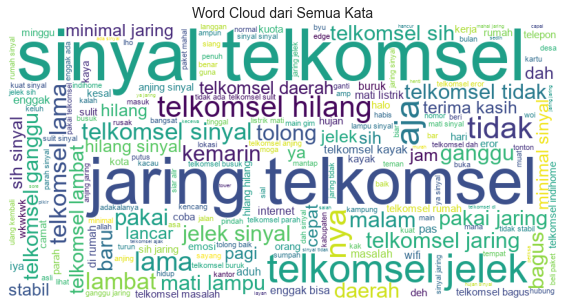

In [24]:
# Wordcloud semua ulasan kata

# Memisahkan kata-kata dalam semua ulasan
semua_words = df['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata menjadi satu teks
list_words_semua = [word for row_word in semua_words for word in row_word]
list_words_semua = ' '.join(list_words_semua)

# Mengatur font yang tersedia untuk WordCloud (ganti dengan path font yang tersedia di sistem Anda)
font_path = 'C:\Windows\Fonts\Arial.ttf'  # Ganti dengan path font TrueType yang sesuai

# Membuat objek WordCloud dengan pengaturan font_path
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(list_words_semua)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Semua Kata', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud)
ax.axis('off')

plt.tight_layout()
plt.show()

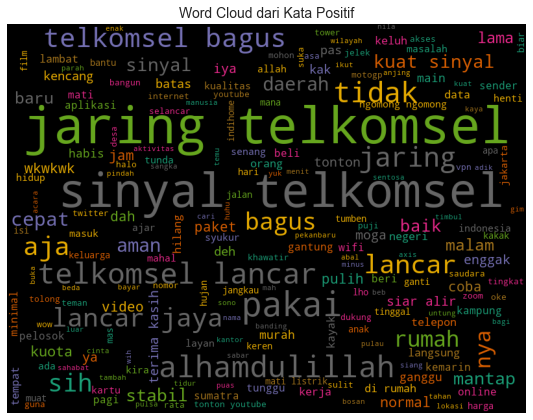

In [25]:
# Wordcloud ulasan kata positif

# Filter ulasan positif
positif_review = df[df['Label'] == 'Positif']

# Memisahkan kata-kata dalam ulasan positif
positif_words = positif_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata positif menjadi satu teks
list_words_positif = [word for row_word in positif_words for word in row_word]
list_words_positif = ' '.join(list_words_positif)

# Membuat word cloud dari kata-kata positif
wordcloud_positif = WordCloud(width=800, height=600, background_color='black', colormap='Dark2_r', min_font_size=10).generate(list_words_positif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Positif', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_positif)
ax.axis('off')

plt.tight_layout()
plt.show()

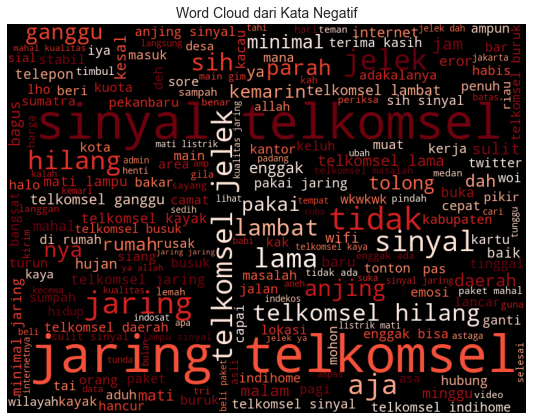

In [26]:
# Wordcloud ulasan kata negatif

# Filter ulasan negatif
negatif_review = df[df['Label'] == 'Negatif']

# Memisahkan kata-kata dalam ulasan negatif
negatif_words = negatif_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata negatif menjadi satu teks
list_words_negatif = [word for row_word in negatif_words for word in row_word]
list_words_negatif = ' '.join(list_words_negatif)

# Membuat word cloud dari kata-kata negatif
wordcloud_negatif = WordCloud(width=800, height=600, background_color='black', colormap='Reds', min_font_size=10).generate(list_words_negatif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Negatif', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_negatif)
ax.axis('off')

plt.tight_layout()
plt.show()

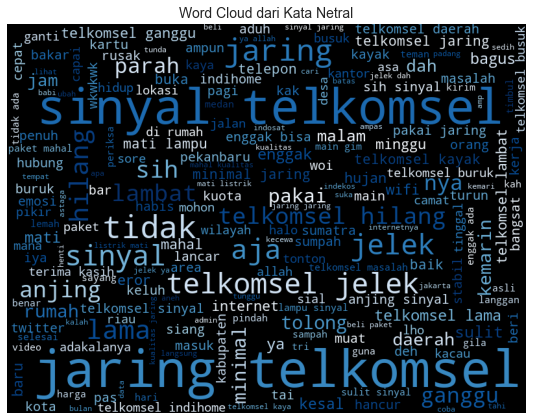

In [27]:
# Wordcloud ulasan kata netral

# Filter ulasan netra;
netral_review = df[df['Label'] == 'Netral']

# Memisahkan kata-kata dalam ulasan netral
netral_words = netral_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata netral menjadi satu teks
list_words_netral = [word for row_word in netral_words for word in row_word]
list_words_netral = ' '.join(list_words_netral)

# Membuat word cloud dari kata-kata netral
wordcloud_netral = WordCloud(width=800, height=600, background_color='black', colormap='Blues_r', min_font_size=10).generate(list_words_negatif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Netral', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_netral)
ax.axis('off')

plt.tight_layout()
plt.show()

IMPLEMENTASI SVM

Testing SVM with C= 0.1:
(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)


C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)
Cross Validation Fold 1:
Accuracy: 81.28%
Precision: 66.07%
Recall: 81.28%
F1-Score: 72.89%

Cross Validation Fold 2:
Accuracy: 81.03%
Precision: 65.65%
Recall: 81.03%
F1-Score: 72.53%

Cross Validation Fold 3:
Accuracy: 80.51%
Precision: 75.60%
Recall: 80.51%
F1-Score: 72.07%

Cross Validation Fold 4:
Accuracy: 78.21%
Precision: 71.97%
Recall: 78.21%
F1-Score: 69.33%

Cross Validation Fold 5:
Accuracy: 80.51%
Precision: 64.82%
Recall: 80.51%
F1-Score: 71.82%

Cross Validation Fold 6:
Accuracy: 80.77%
Precision: 65.24%
Recall: 80.77%
F1-Score: 72.18%

Cross Validation Fold 7:
Accuracy: 77.95%
Precision: 71.29%
Recall: 77.95%
F1-Score: 68.54%

Cross Validation Fold 8:
Accuracy: 84.36%
Precision: 71.16%
Recall: 84.36%
F1-Score: 77.20%

Cross Validation Fold 9:
Accuracy: 77.95%
Precision: 72.57%
Recall: 77.95%
F1-Score: 68.54%

Cross Validation Fold 10:
Accuracy: 79.74%
Precision: 73.11%
Recall: 79.74%
F1-Score: 71.43%

Confusion Matrix Fold 1:
[[31

C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

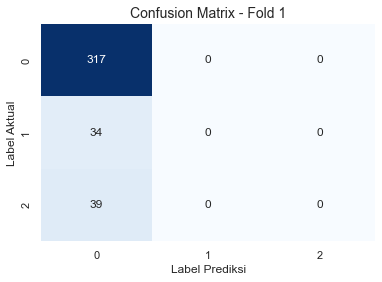


Confusion Matrix Fold 2:
[[316   0   0]
 [ 39   0   0]
 [ 35   0   0]]


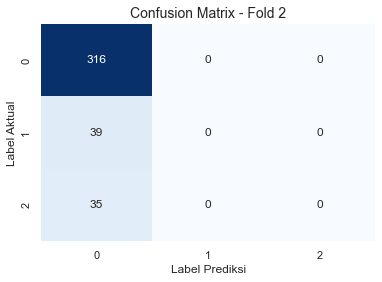


Confusion Matrix Fold 3:
[[313   0   0]
 [ 34   0   0]
 [ 42   0   1]]


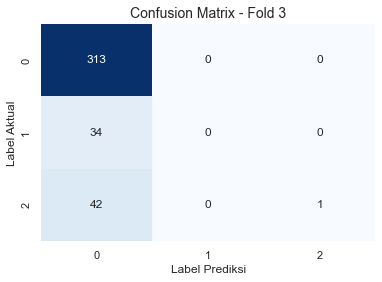


Confusion Matrix Fold 4:
[[302   0   0]
 [ 43   0   0]
 [ 42   0   3]]


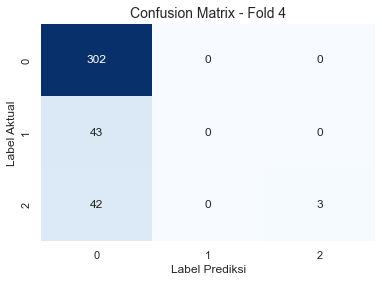


Confusion Matrix Fold 5:
[[314   0   0]
 [ 37   0   0]
 [ 39   0   0]]


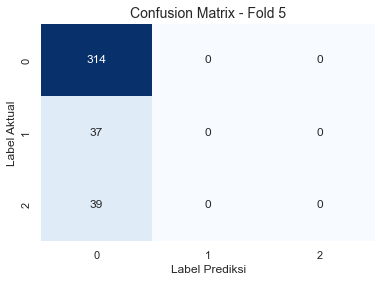


Confusion Matrix Fold 6:
[[315   0   0]
 [ 38   0   0]
 [ 37   0   0]]


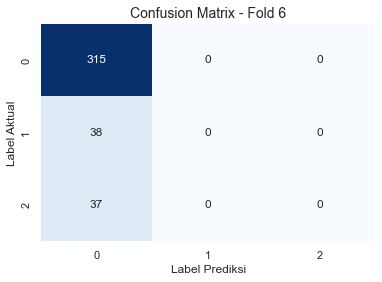


Confusion Matrix Fold 7:
[[303   0   0]
 [ 45   0   0]
 [ 41   0   1]]


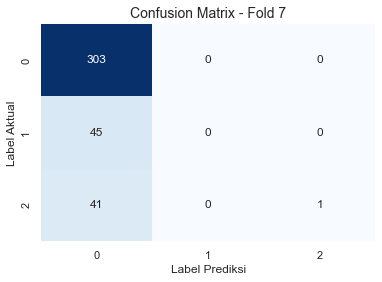


Confusion Matrix Fold 8:
[[329   0   0]
 [ 38   0   0]
 [ 23   0   0]]


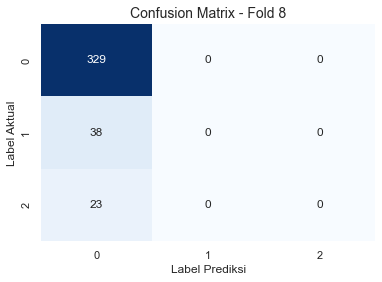


Confusion Matrix Fold 9:
[[303   0   0]
 [ 40   0   0]
 [ 46   0   1]]


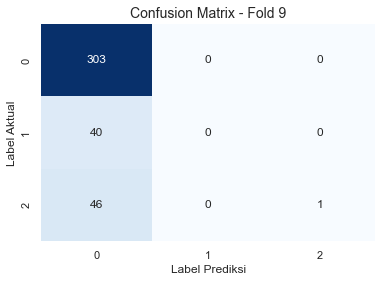


Confusion Matrix Fold 10:
[[308   0   0]
 [ 42   0   0]
 [ 37   0   3]]


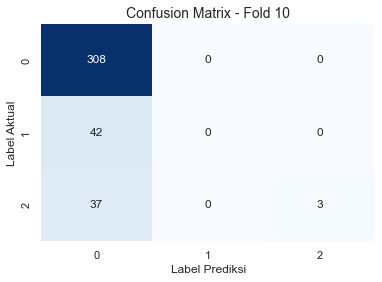


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.81      1.00      0.90       317
      Netral       0.00      0.00      0.00        34
     Positif       0.00      0.00      0.00        39

    accuracy                           0.81       390
   macro avg       0.27      0.33      0.30       390
weighted avg       0.66      0.81      0.73       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.81      1.00      0.90       316
      Netral       0.00      0.00      0.00        39
     Positif       0.00      0.00      0.00        35

    accuracy                           0.81       390
   macro avg       0.27      0.33      0.30       390
weighted avg       0.66      0.81      0.73       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.80      1.00      0.89       313
      Netral       0.00      0.00      0.0

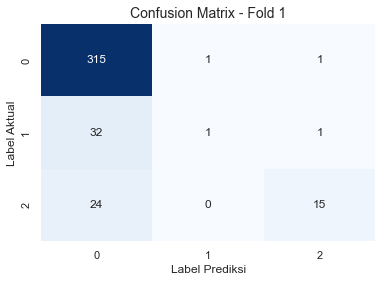


Confusion Matrix Fold 2:
[[312   2   2]
 [ 37   1   1]
 [ 13   2  20]]


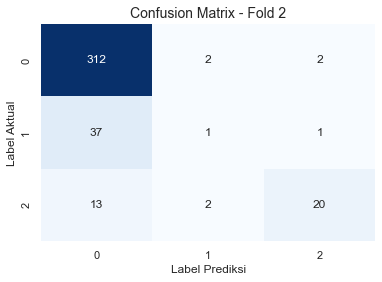


Confusion Matrix Fold 3:
[[309   0   4]
 [ 29   4   1]
 [ 29   0  14]]


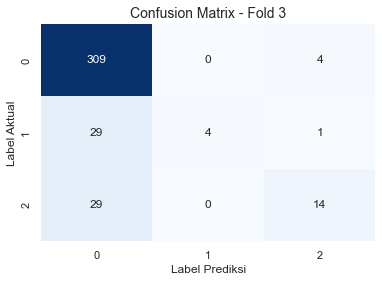


Confusion Matrix Fold 4:
[[301   0   1]
 [ 40   2   1]
 [ 21   0  24]]


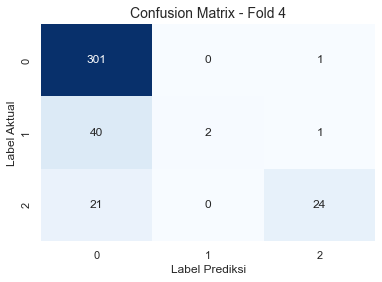


Confusion Matrix Fold 5:
[[314   0   0]
 [ 32   2   3]
 [ 30   0   9]]


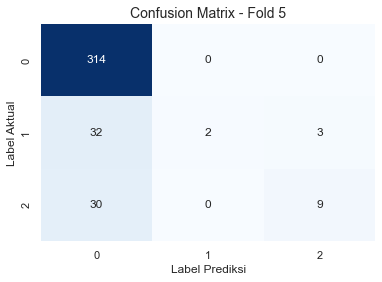


Confusion Matrix Fold 6:
[[313   1   1]
 [ 35   3   0]
 [ 20   0  17]]


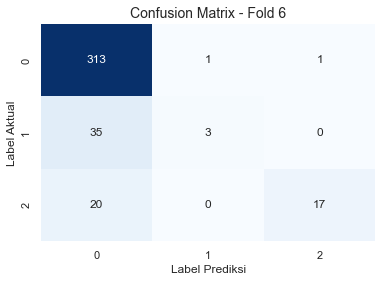


Confusion Matrix Fold 7:
[[300   2   1]
 [ 42   2   1]
 [ 23   0  19]]


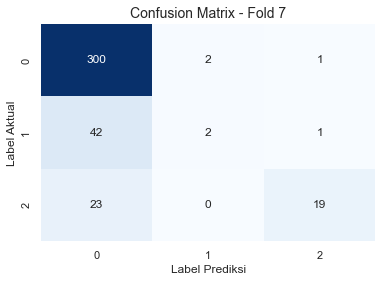


Confusion Matrix Fold 8:
[[325   1   3]
 [ 34   3   1]
 [ 10   0  13]]


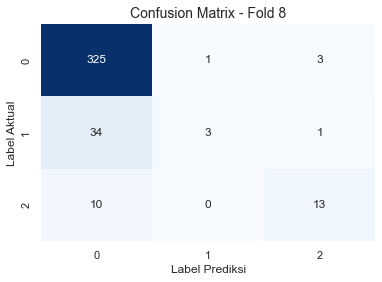


Confusion Matrix Fold 9:
[[300   1   2]
 [ 39   1   0]
 [ 26   1  20]]


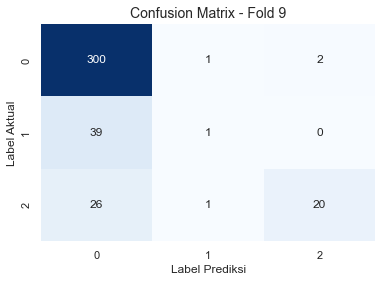


Confusion Matrix Fold 10:
[[305   0   3]
 [ 39   1   2]
 [ 20   1  19]]


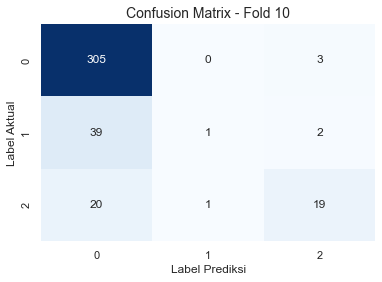


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.99      0.92       317
      Netral       0.50      0.03      0.06        34
     Positif       0.88      0.38      0.54        39

    accuracy                           0.85       390
   macro avg       0.74      0.47      0.50       390
weighted avg       0.82      0.85      0.80       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.99      0.92       316
      Netral       0.20      0.03      0.05        39
     Positif       0.87      0.57      0.69        35

    accuracy                           0.85       390
   macro avg       0.64      0.53      0.55       390
weighted avg       0.80      0.85      0.81       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       1.00      0.12      0.2

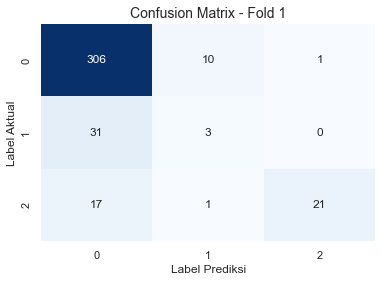


Confusion Matrix Fold 2:
[[301  10   5]
 [ 32   6   1]
 [ 11   4  20]]


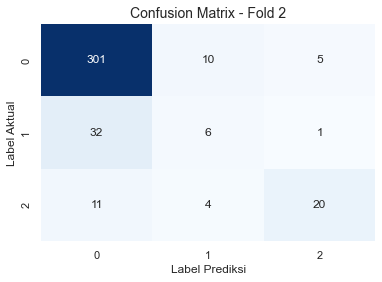


Confusion Matrix Fold 3:
[[302   6   5]
 [ 22   8   4]
 [ 21   4  18]]


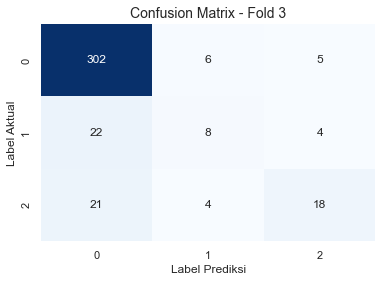


Confusion Matrix Fold 4:
[[295   6   1]
 [ 34   7   2]
 [ 16   0  29]]


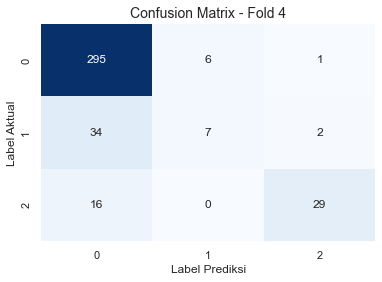


Confusion Matrix Fold 5:
[[306   7   1]
 [ 27   6   4]
 [ 22   1  16]]


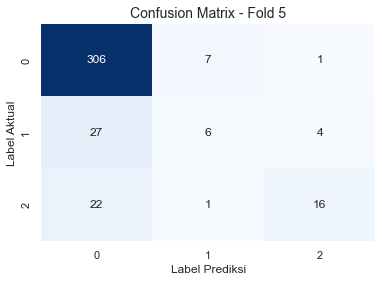


Confusion Matrix Fold 6:
[[307   4   4]
 [ 32   6   0]
 [ 16   0  21]]


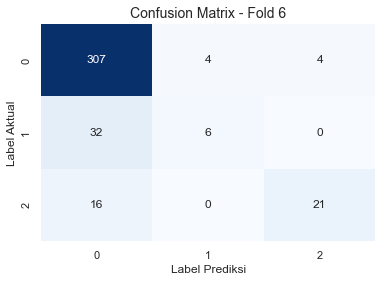


Confusion Matrix Fold 7:
[[292   9   2]
 [ 31  12   2]
 [ 18   1  23]]


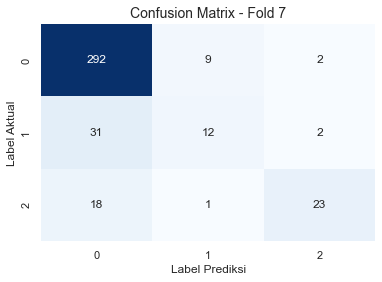


Confusion Matrix Fold 8:
[[318   5   6]
 [ 32   4   2]
 [  9   1  13]]


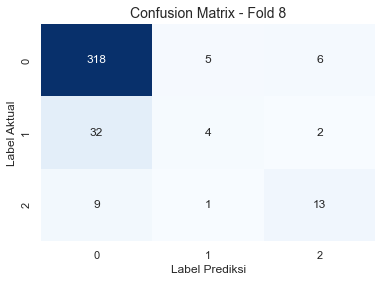


Confusion Matrix Fold 9:
[[294   3   6]
 [ 29   9   2]
 [ 22   4  21]]


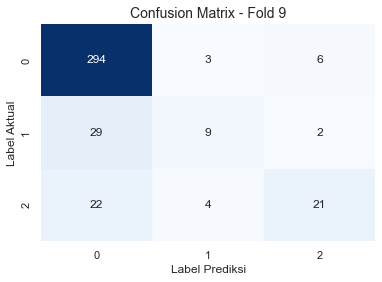


Confusion Matrix Fold 10:
[[298   3   7]
 [ 35   4   3]
 [ 15   3  22]]


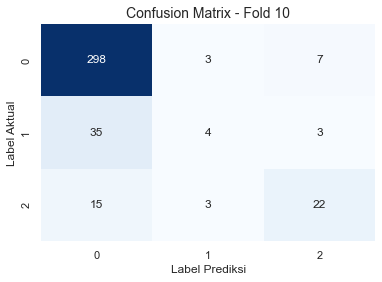


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.86      0.97      0.91       317
      Netral       0.21      0.09      0.12        34
     Positif       0.95      0.54      0.69        39

    accuracy                           0.85       390
   macro avg       0.68      0.53      0.58       390
weighted avg       0.82      0.85      0.82       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.88      0.95      0.91       316
      Netral       0.30      0.15      0.20        39
     Positif       0.77      0.57      0.66        35

    accuracy                           0.84       390
   macro avg       0.65      0.56      0.59       390
weighted avg       0.81      0.84      0.82       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.88      0.96      0.92       313
      Netral       0.44      0.24      0.3

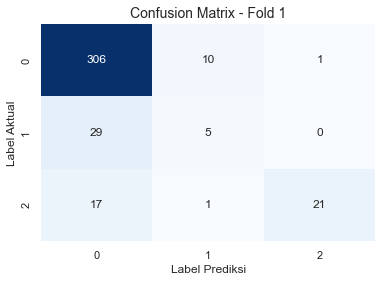


Confusion Matrix Fold 2:
[[301  10   5]
 [ 32   6   1]
 [ 11   4  20]]


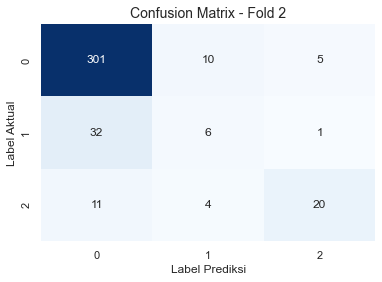


Confusion Matrix Fold 3:
[[300   8   5]
 [ 21   9   4]
 [ 21   4  18]]


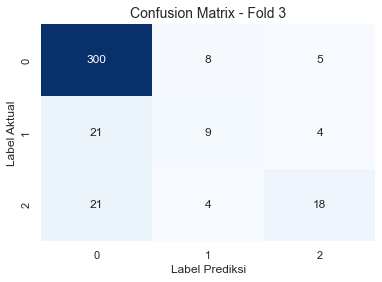


Confusion Matrix Fold 4:
[[294   7   1]
 [ 33   8   2]
 [ 14   2  29]]


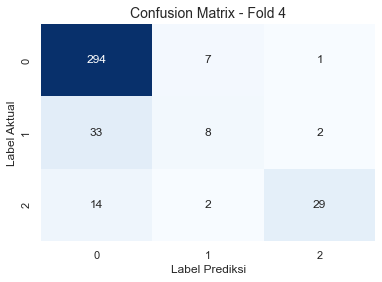


Confusion Matrix Fold 5:
[[305   8   1]
 [ 26   7   4]
 [ 23   1  15]]


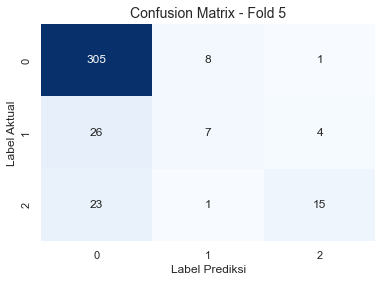


Confusion Matrix Fold 6:
[[307   4   4]
 [ 32   6   0]
 [ 17   0  20]]


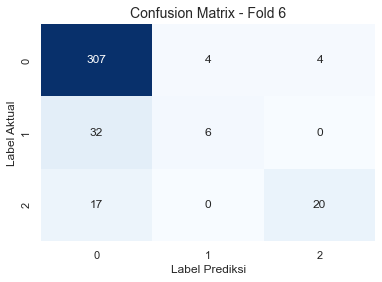


Confusion Matrix Fold 7:
[[293   8   2]
 [ 31  12   2]
 [ 17   2  23]]


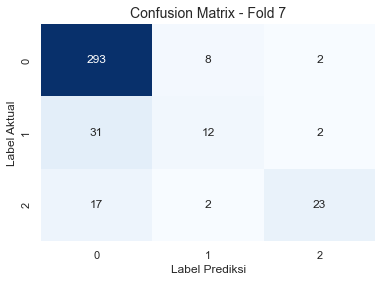


Confusion Matrix Fold 8:
[[318   5   6]
 [ 32   4   2]
 [  9   1  13]]


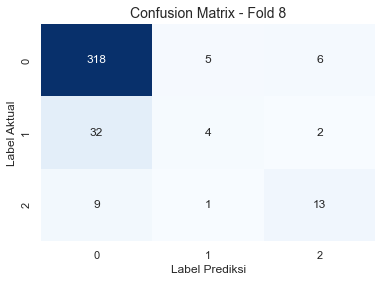


Confusion Matrix Fold 9:
[[294   3   6]
 [ 29   9   2]
 [ 22   4  21]]


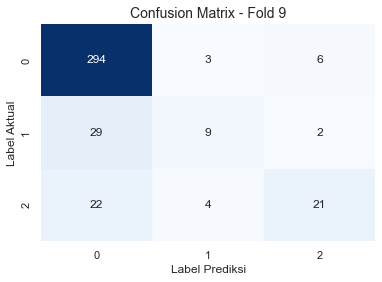


Confusion Matrix Fold 10:
[[297   4   7]
 [ 34   5   3]
 [ 14   3  23]]


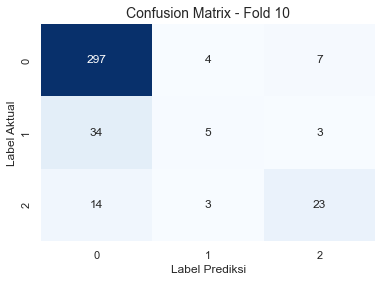


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.87      0.97      0.91       317
      Netral       0.31      0.15      0.20        34
     Positif       0.95      0.54      0.69        39

    accuracy                           0.85       390
   macro avg       0.71      0.55      0.60       390
weighted avg       0.83      0.85      0.83       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.88      0.95      0.91       316
      Netral       0.30      0.15      0.20        39
     Positif       0.77      0.57      0.66        35

    accuracy                           0.84       390
   macro avg       0.65      0.56      0.59       390
weighted avg       0.81      0.84      0.82       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.88      0.96      0.92       313
      Netral       0.43      0.26      0.3

C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\3815015225.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['label_prediksi_SVM'] = cf_model_svm
C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\3815015225.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unlabel['label_prediksi_SVM'] = unlabel_predictions_svm


Hasil Prediksi SVM telah ditambahkan ke data latih dan data uji.
Data dengan label prediksi telah disimpan ke dalam 'data_hasil_prediksi_svm2.csv'.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shutil
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Nilai C yang akan diuji
C_values = [0.1, 1, 10, 100]

# Inisialisasi model SVM dengan kernel RBF
svm_classifier = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale', C=C_values))

# Membuat objek StratifiedKFold untuk cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan hasil prediksi terbaik
best_svm_classifier = None
best_accuracy = 0  # Untuk menyimpan akurasi terbaik
best_C = None      # Untuk menyimpan nilai C terbaik
best_models = None

# Loop untuk menguji setiap nilai C
for C in C_values:
    print(f"Testing SVM with C= {C}:")
    
    # Inisialisasi model SVM dengan kernel RBF dan nilai C tertentu
    svm_classifier = OneVsRestClassifier(SVC(kernel='rbf', gamma='scale', C=C))
    
    # Inisialisasi list untuk menyimpan metrik evaluasi dari masing-masing fold
    all_fold_predictions = []
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []
    confusion_matrices = []
    report_classifications = []
    models = []
    models_per_C = []
    
    # Loop untuk melakukan cross-validation dan menghitung metrik evaluasi
    for i, (train_index, test_index) in enumerate(cv.split(X_label_tfidf, y)):
        X_train_fold, X_test_fold = X_label_tfidf[train_index], X_label_tfidf[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, y_train_fold.shape, y_test_fold.shape)

        # Melatih model pada fold saat ini
        svm_classifier.fit(X_train_fold, y_train_fold)

        # Memprediksi label pada fold saat ini
        y_pred_fold = svm_classifier.predict(X_test_fold)
        
        # Save model per fold
        model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_SVM\\models_per_C\\svm_model_C_{C}_fold_{i}.joblib'
        joblib.dump(svm_classifier, model_filename)
        models_per_C.append(model_filename)

        # Menghitung metrik evaluasi untuk fold saat ini
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
        recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
        f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
        conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
        class_report = classification_report(y_test_fold, y_pred_fold)
        
        # Menyimpan metrik evaluasi dalam list
        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1)
        confusion_matrices.append(conf_matrix)
        report_classifications.append(class_report)

    # Cetak hasil akurasi, presisi, recall, dan F1-score untuk masing-masing fold
    for i in range(10):
        print(f"Cross Validation Fold {i+1}:")
        print(f'Accuracy: {fold_accuracies[i] * 100:.2f}%')
        print(f'Precision: {fold_precisions[i] * 100:.2f}%')
        print(f'Recall: {fold_recalls[i] * 100:.2f}%')
        print(f'F1-Score: {fold_f1_scores[i] * 100:.2f}%')
        print()
    
    # Menampilkan confusion matrix dari setiap fold
    for i, cm in enumerate(confusion_matrices):
        print(f"Confusion Matrix Fold {i+1}:")
        print(cm)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - Fold {i+1}', fontsize=14)
        plt.xlabel('Label Prediksi', fontsize=12)
        plt.ylabel('Label Aktual', fontsize=12)
        plt.show()
        print()
    
    # Menampilkan classifcation report dari setiap fold
    for i, cr in enumerate(report_classifications):
        print(f"Classication Report Fold {i+1}:")
        print(cr)
        print()

    # Cetak rata-rata metrik evaluasi dari semua fold
    mean_accuracy = sum(fold_accuracies) / 10 * 100
    mean_precision = sum(fold_precisions) / 10 * 100
    mean_recall = sum(fold_recalls) / 10 * 100
    mean_f1 = sum(fold_f1_scores) / 10 * 100

    print("===========================================")
    print("Rata-rata metrik evaluasi dari semua fold: ")
    print(f'Accuracy: {mean_accuracy:.2f}%')
    print(f'Precision: {mean_precision:.2f}%')
    print(f'Recall: {mean_recall:.2f}%')
    print(f'F1-Score: {mean_f1:.2f}%')
    print("===========================================")
    print()
    
    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_C = C
        best_models = models  # Menyimpan nama file model dari setiap fold yang dianggap terbaik
        all_fold_predictions.extend(y_pred_fold)
        best_svm_classifier = svm_classifier

# Setelah loop selesai, best_C akan berisi nilai C terbaik
print(f"Best C: {best_C}")

# Prediksi label untuk data latih dan data uji dengan model terbaik
# best_svm_classifier.fit(X_label_tfidf, y)
label_predictions_svm = best_svm_classifier.predict(X_label_tfidf)
cf_model_svm = cross_val_predict(best_svm_classifier, X_label_tfidf, y, cv=cv)
unlabel_predictions_svm = best_svm_classifier.predict(X_unlabel_tfidf)

# Save best model
best_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_SVM\\best_svm_model.joblib'
joblib.dump(best_svm_classifier, best_model_filename)
print(f"Best model saved to: {best_model_filename}")

# Save all models
for i, model_filename in enumerate(best_models):
    new_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_SVM\\{{model_filename.split("\\")[-1]}}'
    shutil.copy(model_filename, new_model_filename)
    print(f"Model {i} saved to: {new_model_filename}")

# Menambahkan kolom label prediksi ke dataset data latih dan data uji
data_label['label_prediksi_SVM'] = cf_model_svm
data_unlabel['label_prediksi_SVM'] = unlabel_predictions_svm

# Menyimpan dataset yang telah diperbarui ke dalam satu file CSV
data_hasil_prediksi_svm = pd.concat([data_label, data_unlabel])
data_hasil_prediksi_svm.to_csv('data_hasil_prediksi_svm.csv', index=False)
print("Hasil Prediksi SVM telah ditambahkan ke data latih dan data uji.")
print("Data dengan label prediksi telah disimpan ke dalam 'data_hasil_prediksi_svm2.csv'.")

Confusion Matrix Model SVM:
[[3015   67   38]
 [ 299   71   20]
 [ 165   22  203]]


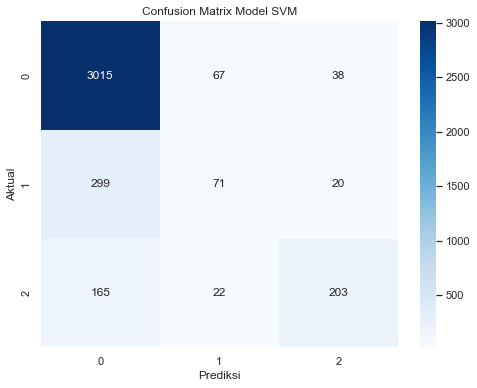

Classification Report Model SVM:
              precision    recall  f1-score   support

     Negatif       0.87      0.97      0.91      3120
      Netral       0.44      0.18      0.26       390
     Positif       0.78      0.52      0.62       390

    accuracy                           0.84      3900
   macro avg       0.70      0.56      0.60      3900
weighted avg       0.82      0.84      0.82      3900



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cf_model_svm)

# Menampilkan confusion matrix
print("Confusion Matrix Model SVM:")
print(conf_matrix)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model SVM')
plt.show()

# Menghitung classification report
class_report = classification_report(y, cf_model_svm)

# Menampilkan classification report
print("Classification Report Model SVM:")
print(class_report)

Confusion Matrix Hasil Prediksi SVM:
[[3102   11    7]
 [  43  344    3]
 [  14    5  371]]


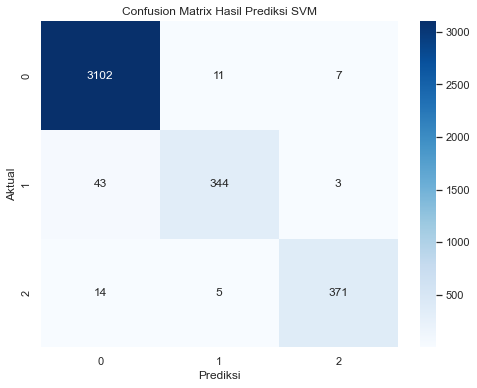

Classification Report Hasil Prediksi SVM:
              precision    recall  f1-score   support

     Negatif       0.98      0.99      0.99      3120
      Netral       0.96      0.88      0.92       390
     Positif       0.97      0.95      0.96       390

    accuracy                           0.98      3900
   macro avg       0.97      0.94      0.96      3900
weighted avg       0.98      0.98      0.98      3900



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, label_predictions_svm)

# Menampilkan confusion matrix
print("Confusion Matrix Hasil Prediksi SVM:")
print(conf_matrix)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Hasil Prediksi SVM')
plt.show()

# Menghitung classification report
class_report = classification_report(y, label_predictions_svm)

# Menampilkan classification report
print("Classification Report Hasil Prediksi SVM:")
print(class_report)

IMPLEMENTASI KNN

Testing KNN with K values= 3:
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
(3510, 2642) (390, 2642) (3510,) (390,)
Cross Validation Fold 1:
Accuracy: 79.23%
Precision: 76.89%
Recall: 79.23%
F1-Score: 77.09%

Cross Validation Fold 2:
Accuracy: 79.23%
Precision: 77.45%
Recall: 79.23%
F1-Score: 78.24%

Cross Validation Fold 3:
Accuracy: 78.97%
Precision: 75.53%
Recall: 78.97%
F1-Score: 76.72%

Cross Validation Fold 4:
Accuracy: 78.97%
Precision: 73.92%
Recall: 78.97%
F1-Score: 75.35%

Cross Validation Fold 5:
Accuracy: 80.00%
Precision: 76.48%
Recall: 80.00%
F1-Score: 77.60%

Cross Validation Fold 6:
Accuracy: 80.00%
Precision: 76.38%
Recall: 80.00%
F1-Score: 77.68%

Cross Valida

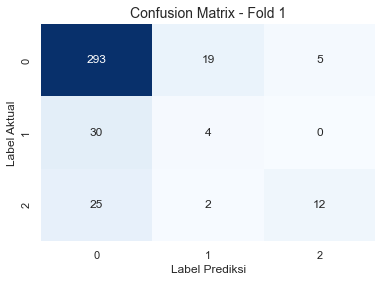


Confusion Matrix Fold 2:
[[284  22  10]
 [ 30   7   2]
 [ 16   1  18]]


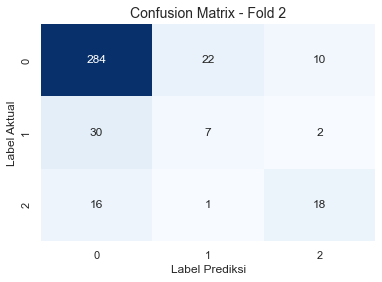


Confusion Matrix Fold 3:
[[290  14   9]
 [ 24   6   4]
 [ 29   2  12]]


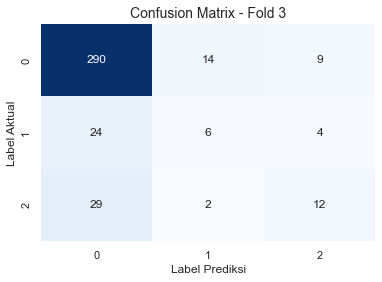


Confusion Matrix Fold 4:
[[287  10   5]
 [ 37   3   3]
 [ 24   3  18]]


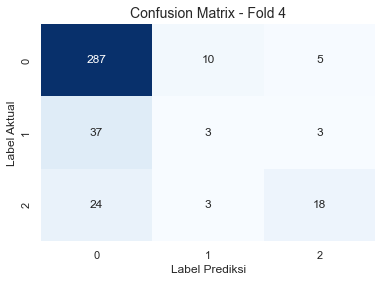


Confusion Matrix Fold 5:
[[294  15   5]
 [ 28   5   4]
 [ 24   2  13]]


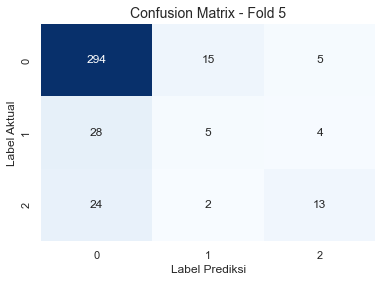


Confusion Matrix Fold 6:
[[294  14   7]
 [ 32   4   2]
 [ 19   4  14]]


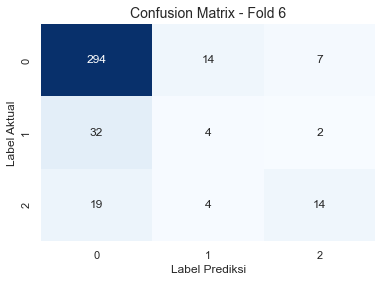


Confusion Matrix Fold 7:
[[285  14   4]
 [ 34   7   4]
 [ 21   0  21]]


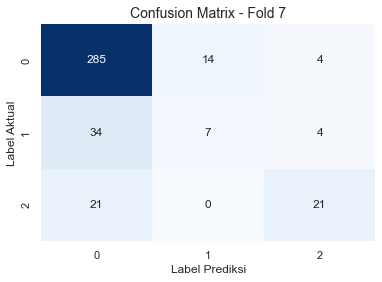


Confusion Matrix Fold 8:
[[311  13   5]
 [ 29   6   3]
 [ 10   3  10]]


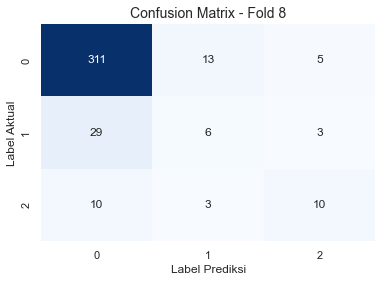


Confusion Matrix Fold 9:
[[280  16   7]
 [ 34   3   3]
 [ 20   4  23]]


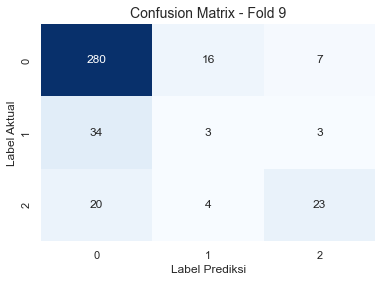


Confusion Matrix Fold 10:
[[282  11  15]
 [ 34   4   4]
 [ 24   2  14]]


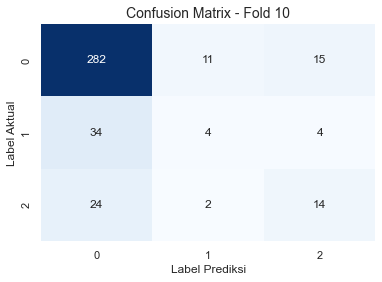


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.84      0.92      0.88       317
      Netral       0.16      0.12      0.14        34
     Positif       0.71      0.31      0.43        39

    accuracy                           0.79       390
   macro avg       0.57      0.45      0.48       390
weighted avg       0.77      0.79      0.77       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88       316
      Netral       0.23      0.18      0.20        39
     Positif       0.60      0.51      0.55        35

    accuracy                           0.79       390
   macro avg       0.56      0.53      0.55       390
weighted avg       0.77      0.79      0.78       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.85      0.93      0.88       313
      Netral       0.27      0.18      0.2

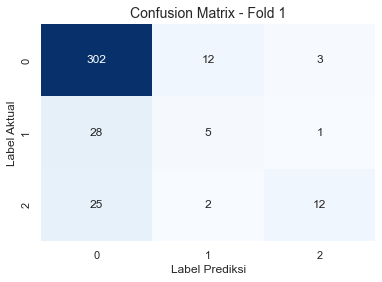


Confusion Matrix Fold 2:
[[292  16   8]
 [ 31   6   2]
 [ 18   3  14]]


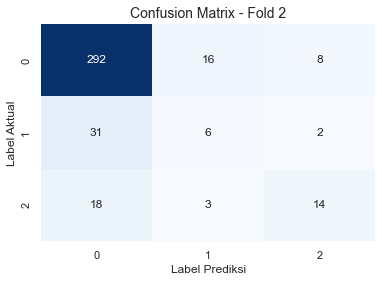


Confusion Matrix Fold 3:
[[306   2   5]
 [ 27   4   3]
 [ 30   2  11]]


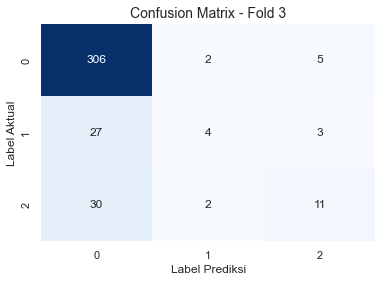


Confusion Matrix Fold 4:
[[297   2   3]
 [ 39   2   2]
 [ 22   1  22]]


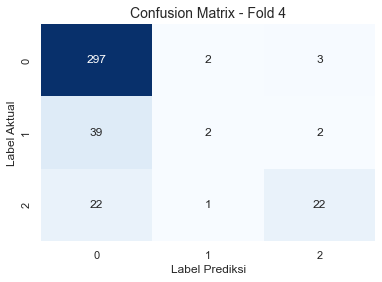


Confusion Matrix Fold 5:
[[302   9   3]
 [ 28   6   3]
 [ 30   0   9]]


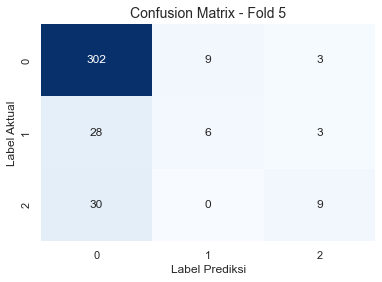


Confusion Matrix Fold 6:
[[300   9   6]
 [ 30   7   1]
 [ 24   2  11]]


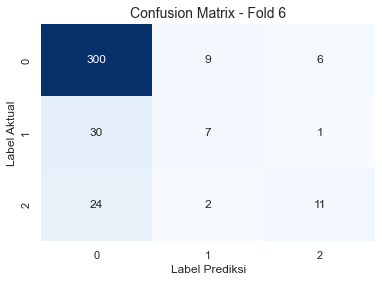


Confusion Matrix Fold 7:
[[291  10   2]
 [ 36   6   3]
 [ 19   3  20]]


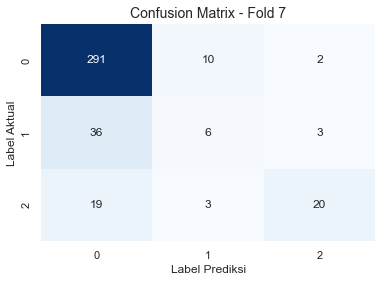


Confusion Matrix Fold 8:
[[308  18   3]
 [ 30   5   3]
 [ 10   3  10]]


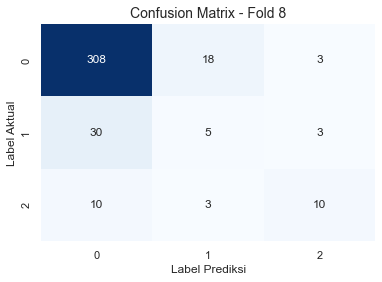


Confusion Matrix Fold 9:
[[288   9   6]
 [ 37   2   1]
 [ 20   8  19]]


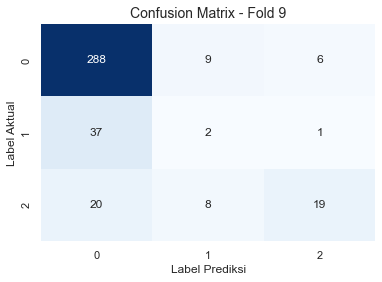


Confusion Matrix Fold 10:
[[288  11   9]
 [ 33   6   3]
 [ 25   4  11]]


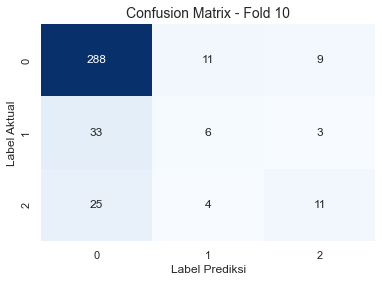


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.95      0.90       317
      Netral       0.26      0.15      0.19        34
     Positif       0.75      0.31      0.44        39

    accuracy                           0.82       390
   macro avg       0.62      0.47      0.51       390
weighted avg       0.79      0.82      0.79       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.92      0.89       316
      Netral       0.24      0.15      0.19        39
     Positif       0.58      0.40      0.47        35

    accuracy                           0.80       390
   macro avg       0.56      0.49      0.52       390
weighted avg       0.77      0.80      0.78       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91       313
      Netral       0.50      0.12      0.1

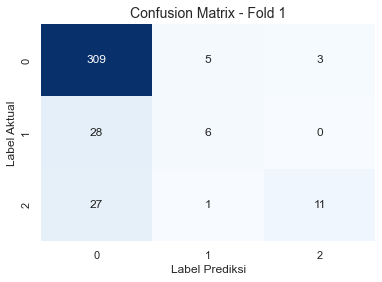


Confusion Matrix Fold 2:
[[300  10   6]
 [ 31   6   2]
 [ 19   2  14]]


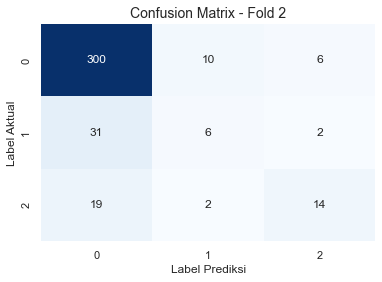


Confusion Matrix Fold 3:
[[308   2   3]
 [ 26   5   3]
 [ 32   1  10]]


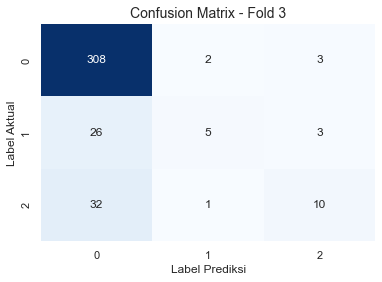


Confusion Matrix Fold 4:
[[299   1   2]
 [ 37   5   1]
 [ 21   1  23]]


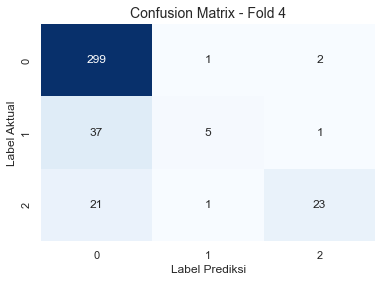


Confusion Matrix Fold 5:
[[307   5   2]
 [ 29   4   4]
 [ 25   1  13]]


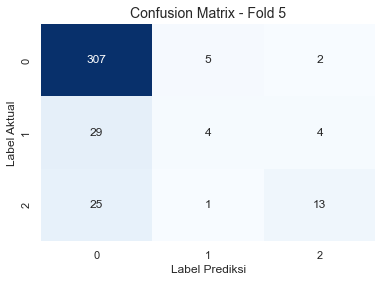


Confusion Matrix Fold 6:
[[307   4   4]
 [ 32   5   1]
 [ 22   3  12]]


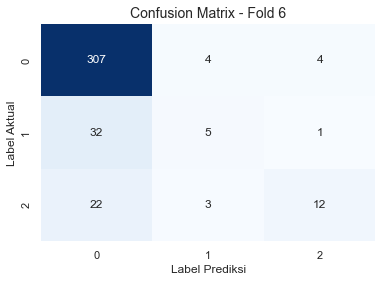


Confusion Matrix Fold 7:
[[298   3   2]
 [ 33   8   4]
 [ 20   1  21]]


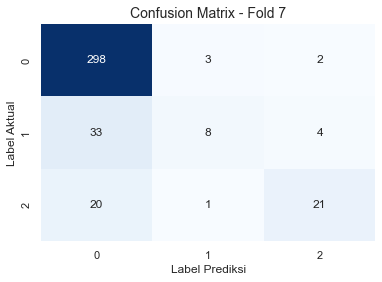


Confusion Matrix Fold 8:
[[313  11   5]
 [ 31   4   3]
 [ 11   2  10]]


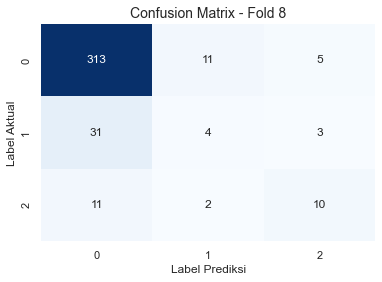


Confusion Matrix Fold 9:
[[291   7   5]
 [ 36   3   1]
 [ 22   5  20]]


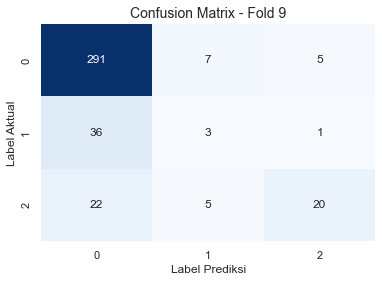


Confusion Matrix Fold 10:
[[297   5   6]
 [ 32   7   3]
 [ 25   3  12]]


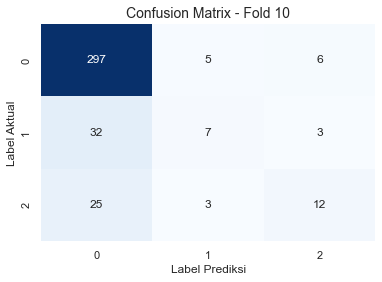


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.97      0.91       317
      Netral       0.50      0.18      0.26        34
     Positif       0.79      0.28      0.42        39

    accuracy                           0.84       390
   macro avg       0.71      0.48      0.53       390
weighted avg       0.81      0.84      0.80       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.95      0.90       316
      Netral       0.33      0.15      0.21        39
     Positif       0.64      0.40      0.49        35

    accuracy                           0.82       390
   macro avg       0.61      0.50      0.53       390
weighted avg       0.78      0.82      0.80       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91       313
      Netral       0.62      0.15      0.2

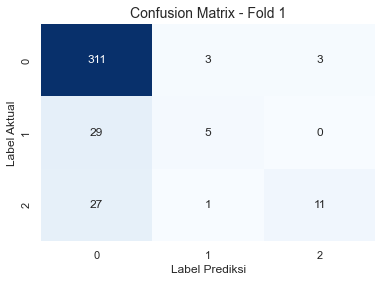


Confusion Matrix Fold 2:
[[305   5   6]
 [ 30   7   2]
 [ 19   1  15]]


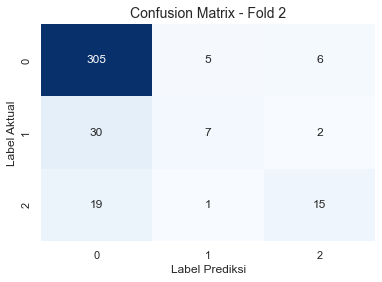


Confusion Matrix Fold 3:
[[307   2   4]
 [ 26   6   2]
 [ 28   2  13]]


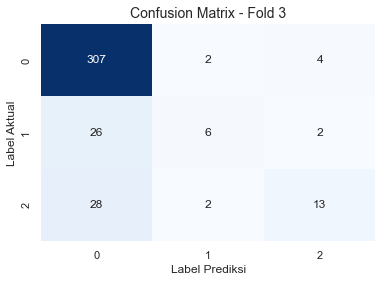


Confusion Matrix Fold 4:
[[299   1   2]
 [ 35   6   2]
 [ 23   1  21]]


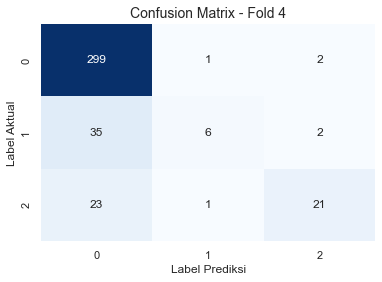


Confusion Matrix Fold 5:
[[307   5   2]
 [ 30   4   3]
 [ 28   0  11]]


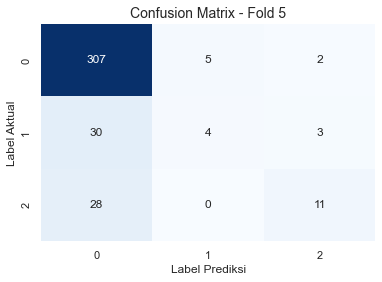


Confusion Matrix Fold 6:
[[306   4   5]
 [ 34   4   0]
 [ 21   3  13]]


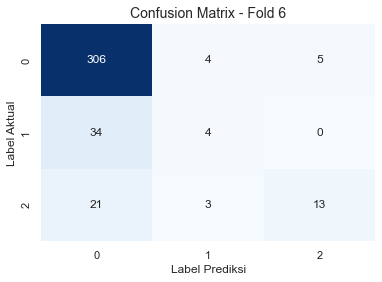


Confusion Matrix Fold 7:
[[299   2   2]
 [ 35   7   3]
 [ 24   0  18]]


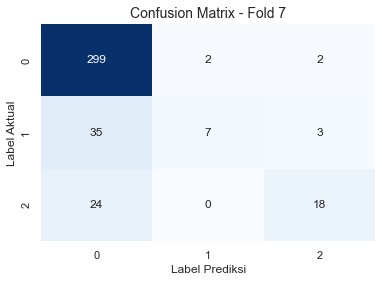


Confusion Matrix Fold 8:
[[320   6   3]
 [ 33   2   3]
 [ 12   1  10]]


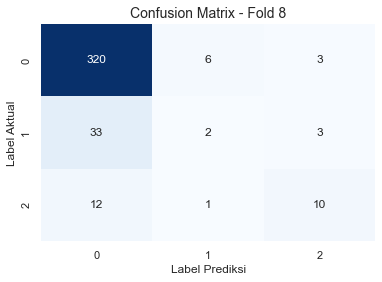


Confusion Matrix Fold 9:
[[296   3   4]
 [ 36   2   2]
 [ 24   5  18]]


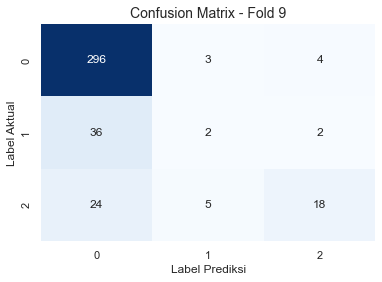


Confusion Matrix Fold 10:
[[296   5   7]
 [ 35   5   2]
 [ 24   1  15]]


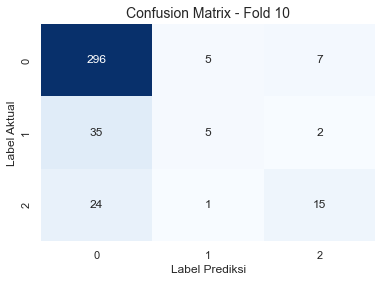


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       317
      Netral       0.56      0.15      0.23        34
     Positif       0.79      0.28      0.42        39

    accuracy                           0.84       390
   macro avg       0.73      0.47      0.52       390
weighted avg       0.82      0.84      0.80       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.97      0.91       316
      Netral       0.54      0.18      0.27        39
     Positif       0.65      0.43      0.52        35

    accuracy                           0.84       390
   macro avg       0.68      0.52      0.57       390
weighted avg       0.81      0.84      0.81       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       313
      Netral       0.60      0.18      0.2

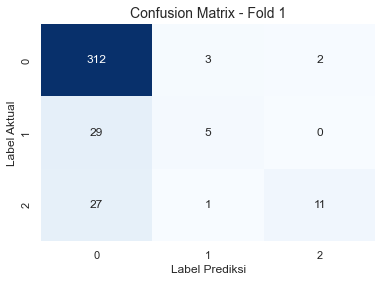


Confusion Matrix Fold 2:
[[306   4   6]
 [ 32   5   2]
 [ 20   1  14]]


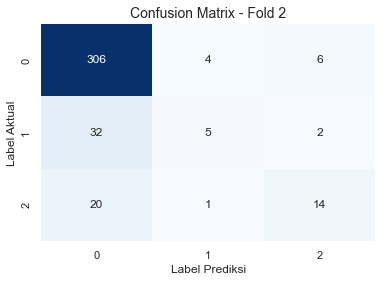


Confusion Matrix Fold 3:
[[308   2   3]
 [ 27   4   3]
 [ 30   1  12]]


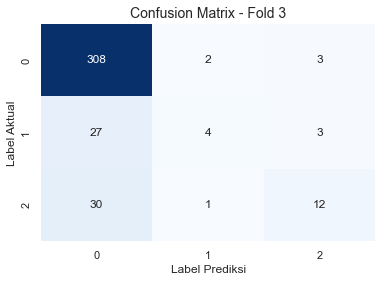


Confusion Matrix Fold 4:
[[299   2   1]
 [ 38   4   1]
 [ 23   1  21]]


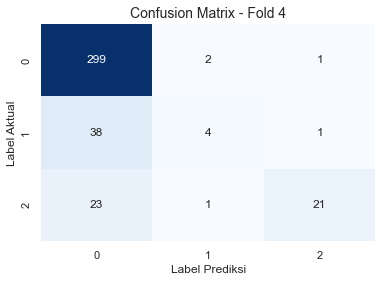


Confusion Matrix Fold 5:
[[310   2   2]
 [ 33   2   2]
 [ 27   1  11]]


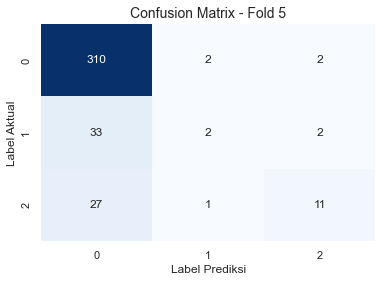


Confusion Matrix Fold 6:
[[307   4   4]
 [ 33   5   0]
 [ 25   0  12]]


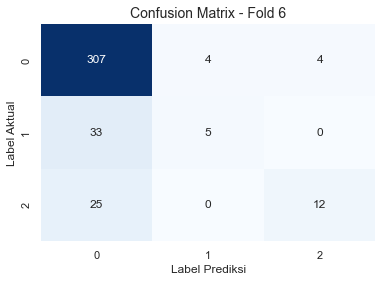


Confusion Matrix Fold 7:
[[297   3   3]
 [ 37   5   3]
 [ 25   0  17]]


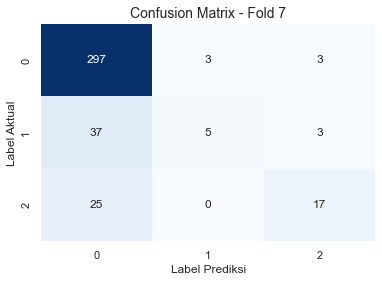


Confusion Matrix Fold 8:
[[319   6   4]
 [ 35   1   2]
 [ 15   0   8]]


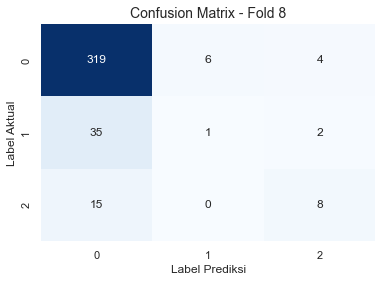


Confusion Matrix Fold 9:
[[296   3   4]
 [ 37   2   1]
 [ 23   4  20]]


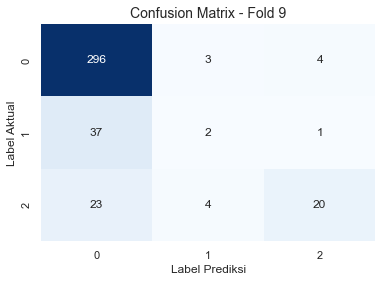


Confusion Matrix Fold 10:
[[296   5   7]
 [ 33   6   3]
 [ 21   4  15]]


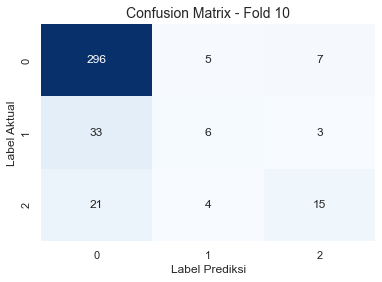


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       317
      Netral       0.56      0.15      0.23        34
     Positif       0.85      0.28      0.42        39

    accuracy                           0.84       390
   macro avg       0.75      0.47      0.52       390
weighted avg       0.82      0.84      0.80       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.85      0.97      0.91       316
      Netral       0.50      0.13      0.20        39
     Positif       0.64      0.40      0.49        35

    accuracy                           0.83       390
   macro avg       0.66      0.50      0.53       390
weighted avg       0.80      0.83      0.80       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91       313
      Netral       0.57      0.12      0.2

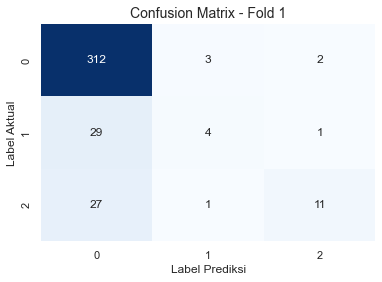


Confusion Matrix Fold 2:
[[306   3   7]
 [ 34   3   2]
 [ 20   0  15]]


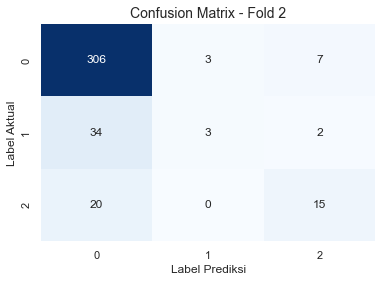


Confusion Matrix Fold 3:
[[308   2   3]
 [ 28   3   3]
 [ 29   1  13]]


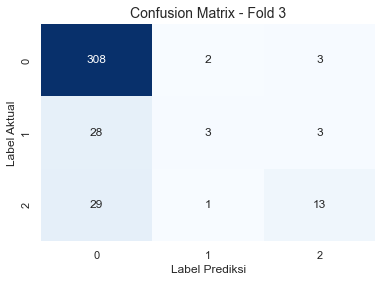


Confusion Matrix Fold 4:
[[298   3   1]
 [ 38   4   1]
 [ 23   0  22]]


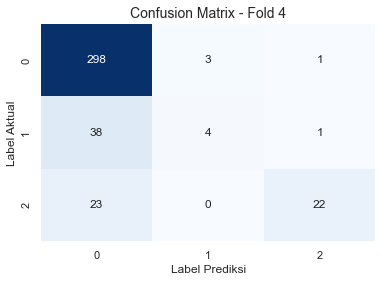


Confusion Matrix Fold 5:
[[309   3   2]
 [ 31   4   2]
 [ 26   0  13]]


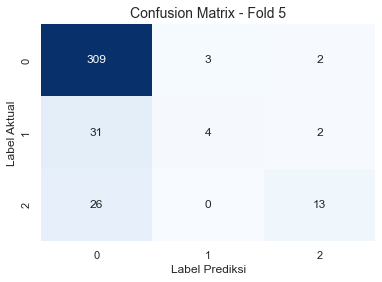


Confusion Matrix Fold 6:
[[310   1   4]
 [ 35   3   0]
 [ 24   0  13]]


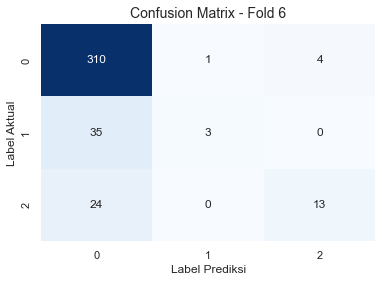


Confusion Matrix Fold 7:
[[297   3   3]
 [ 37   5   3]
 [ 26   0  16]]


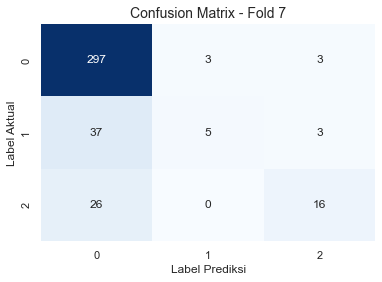


Confusion Matrix Fold 8:
[[319   5   5]
 [ 35   1   2]
 [ 13   0  10]]


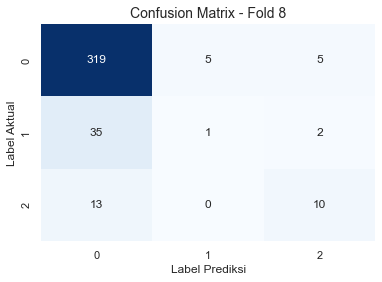


Confusion Matrix Fold 9:
[[299   1   3]
 [ 35   4   1]
 [ 26   3  18]]


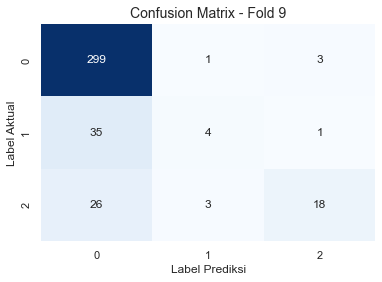


Confusion Matrix Fold 10:
[[297   4   7]
 [ 33   6   3]
 [ 23   0  17]]


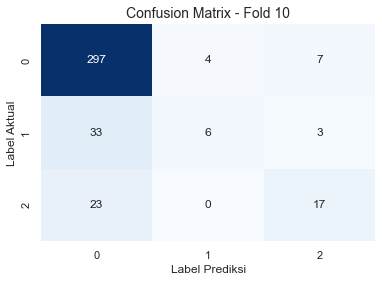


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       317
      Netral       0.50      0.12      0.19        34
     Positif       0.79      0.28      0.42        39

    accuracy                           0.84       390
   macro avg       0.71      0.46      0.51       390
weighted avg       0.81      0.84      0.80       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.85      0.97      0.91       316
      Netral       0.50      0.08      0.13        39
     Positif       0.62      0.43      0.51        35

    accuracy                           0.83       390
   macro avg       0.66      0.49      0.52       390
weighted avg       0.79      0.83      0.79       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91       313
      Netral       0.50      0.09      0.1

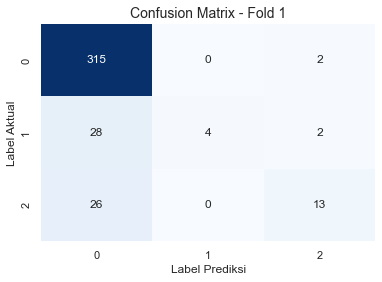


Confusion Matrix Fold 2:
[[310   0   6]
 [ 35   2   2]
 [ 21   0  14]]


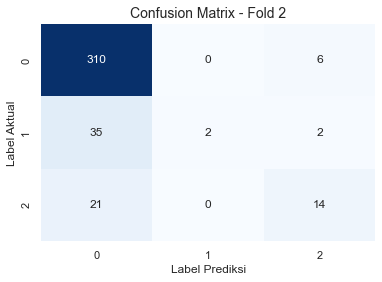


Confusion Matrix Fold 3:
[[309   1   3]
 [ 28   3   3]
 [ 29   1  13]]


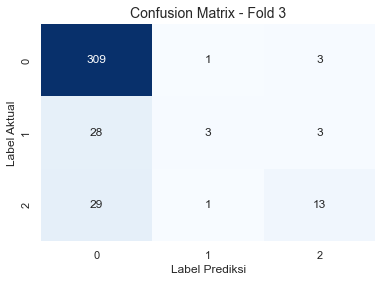


Confusion Matrix Fold 4:
[[301   0   1]
 [ 38   2   3]
 [ 24   0  21]]


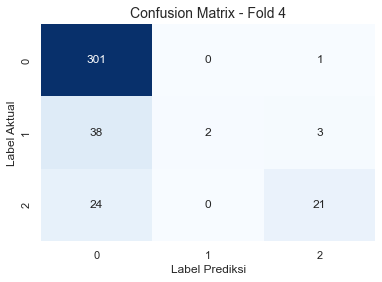


Confusion Matrix Fold 5:
[[309   4   1]
 [ 31   3   3]
 [ 25   1  13]]


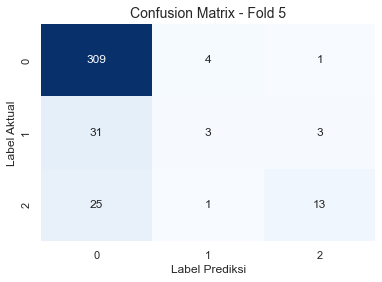


Confusion Matrix Fold 6:
[[309   2   4]
 [ 36   2   0]
 [ 23   0  14]]


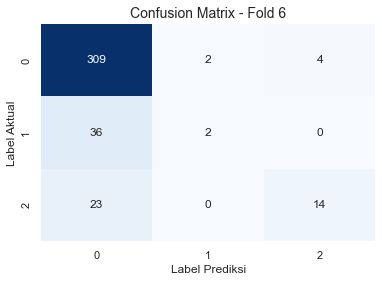


Confusion Matrix Fold 7:
[[300   0   3]
 [ 39   3   3]
 [ 25   0  17]]


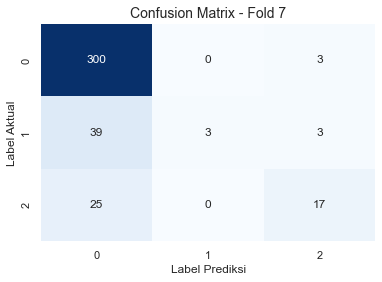


Confusion Matrix Fold 8:
[[318   5   6]
 [ 35   1   2]
 [ 14   0   9]]


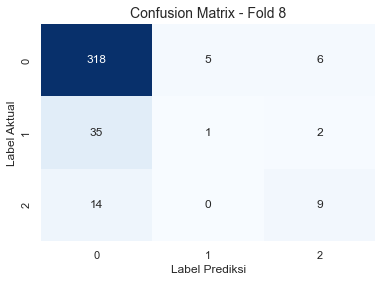


Confusion Matrix Fold 9:
[[298   0   5]
 [ 35   3   2]
 [ 24   2  21]]


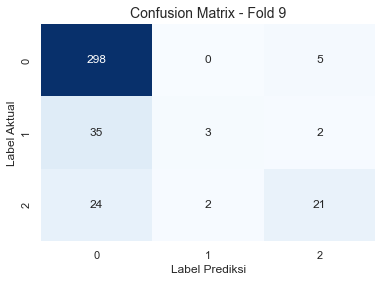


Confusion Matrix Fold 10:
[[298   4   6]
 [ 34   5   3]
 [ 24   1  15]]


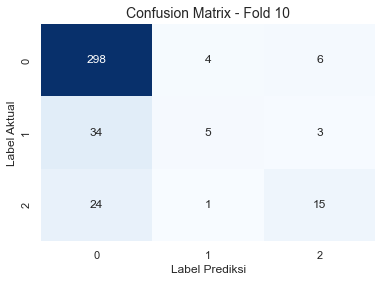


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.99      0.92       317
      Netral       1.00      0.12      0.21        34
     Positif       0.76      0.33      0.46        39

    accuracy                           0.85       390
   macro avg       0.87      0.48      0.53       390
weighted avg       0.86      0.85      0.81       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       316
      Netral       1.00      0.05      0.10        39
     Positif       0.64      0.40      0.49        35

    accuracy                           0.84       390
   macro avg       0.83      0.48      0.50       390
weighted avg       0.84      0.84      0.79       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       0.60      0.09      0.1

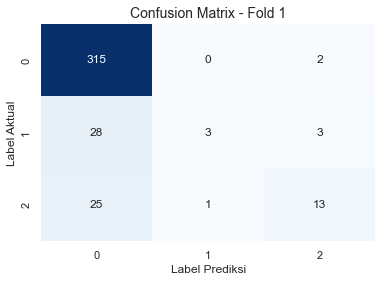


Confusion Matrix Fold 2:
[[310   0   6]
 [ 37   1   1]
 [ 18   1  16]]


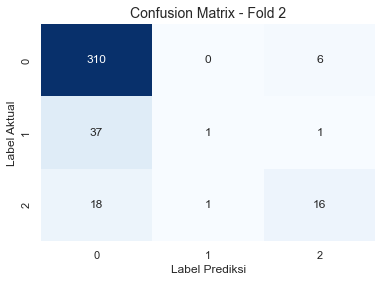


Confusion Matrix Fold 3:
[[309   1   3]
 [ 28   3   3]
 [ 29   1  13]]


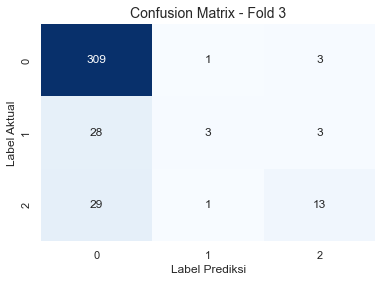


Confusion Matrix Fold 4:
[[301   0   1]
 [ 39   1   3]
 [ 25   0  20]]


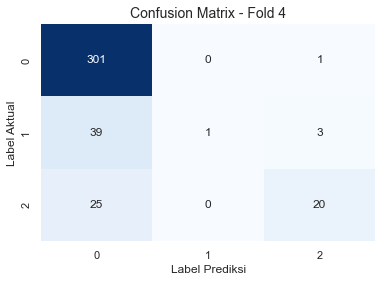


Confusion Matrix Fold 5:
[[311   2   1]
 [ 33   2   2]
 [ 24   2  13]]


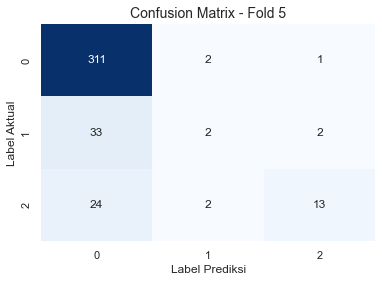


Confusion Matrix Fold 6:
[[309   2   4]
 [ 36   2   0]
 [ 24   0  13]]


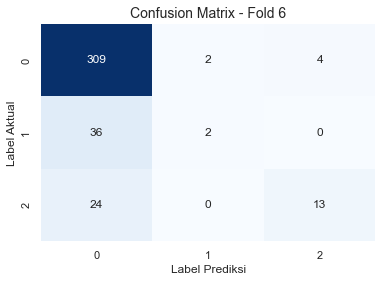


Confusion Matrix Fold 7:
[[300   0   3]
 [ 40   2   3]
 [ 26   0  16]]


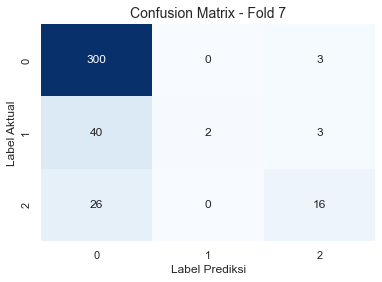


Confusion Matrix Fold 8:
[[323   2   4]
 [ 36   0   2]
 [ 13   0  10]]


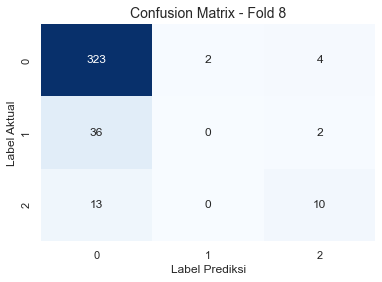


Confusion Matrix Fold 9:
[[299   0   4]
 [ 37   2   1]
 [ 26   3  18]]


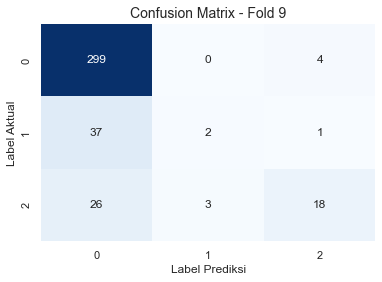


Confusion Matrix Fold 10:
[[300   2   6]
 [ 36   3   3]
 [ 25   1  14]]


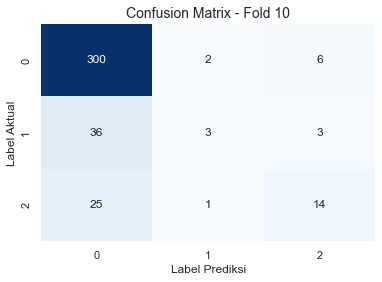


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.86      0.99      0.92       317
      Netral       0.75      0.09      0.16        34
     Positif       0.72      0.33      0.46        39

    accuracy                           0.85       390
   macro avg       0.78      0.47      0.51       390
weighted avg       0.83      0.85      0.81       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       316
      Netral       0.50      0.03      0.05        39
     Positif       0.70      0.46      0.55        35

    accuracy                           0.84       390
   macro avg       0.68      0.49      0.50       390
weighted avg       0.80      0.84      0.79       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       0.60      0.09      0.1

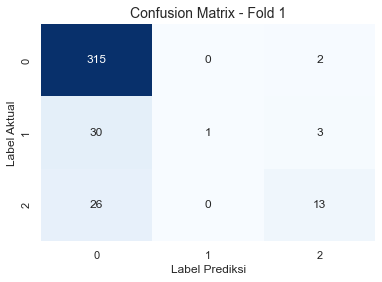


Confusion Matrix Fold 2:
[[310   0   6]
 [ 38   0   1]
 [ 19   1  15]]


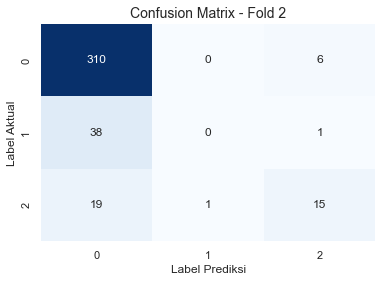


Confusion Matrix Fold 3:
[[310   0   3]
 [ 28   3   3]
 [ 30   1  12]]


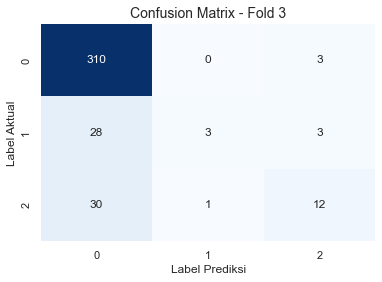


Confusion Matrix Fold 4:
[[300   0   2]
 [ 39   1   3]
 [ 25   0  20]]


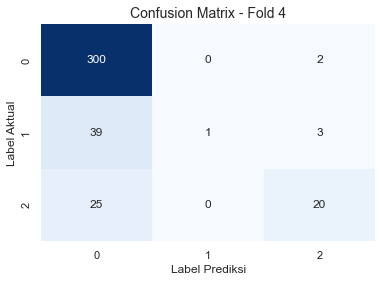


Confusion Matrix Fold 5:
[[311   2   1]
 [ 31   3   3]
 [ 25   1  13]]


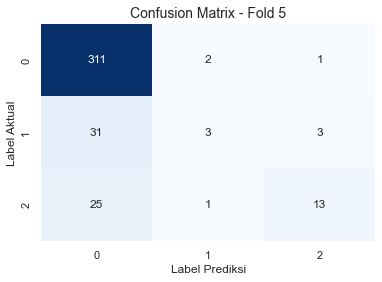


Confusion Matrix Fold 6:
[[310   1   4]
 [ 36   2   0]
 [ 25   1  11]]


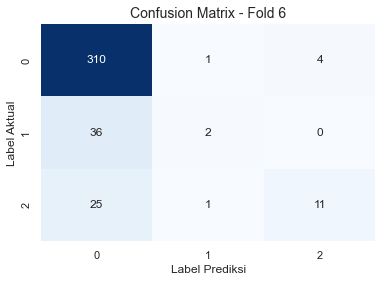


Confusion Matrix Fold 7:
[[300   0   3]
 [ 41   1   3]
 [ 26   0  16]]


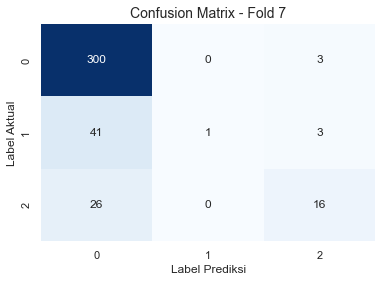


Confusion Matrix Fold 8:
[[324   1   4]
 [ 35   0   3]
 [ 13   0  10]]


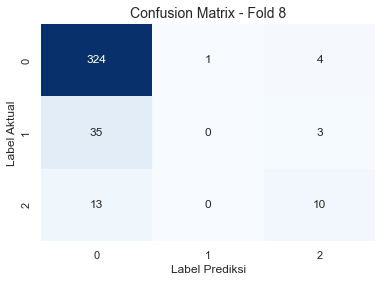


Confusion Matrix Fold 9:
[[299   0   4]
 [ 39   0   1]
 [ 26   3  18]]


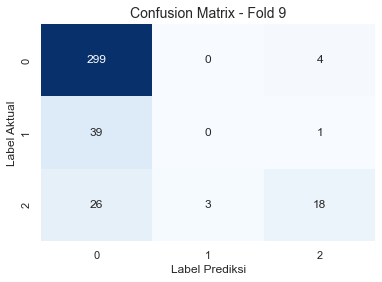


Confusion Matrix Fold 10:
[[302   0   6]
 [ 38   1   3]
 [ 25   0  15]]


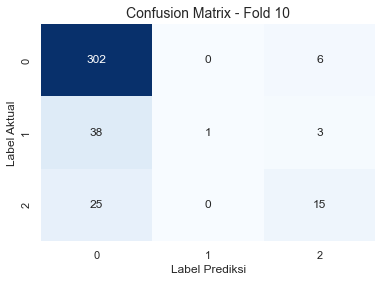


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.99      0.92       317
      Netral       1.00      0.03      0.06        34
     Positif       0.72      0.33      0.46        39

    accuracy                           0.84       390
   macro avg       0.86      0.45      0.48       390
weighted avg       0.85      0.84      0.79       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91       316
      Netral       0.00      0.00      0.00        39
     Positif       0.68      0.43      0.53        35

    accuracy                           0.83       390
   macro avg       0.51      0.47      0.48       390
weighted avg       0.75      0.83      0.78       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       0.75      0.09      0.1

C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MFarchanF\anaconda3\lib\site-packages\sklearn\m

(3510, 2642) (390, 2642) (3510,) (390,)
Cross Validation Fold 1:
Accuracy: 84.10%
Precision: 84.60%
Recall: 84.10%
F1-Score: 79.11%

Cross Validation Fold 2:
Accuracy: 83.59%
Precision: 74.87%
Recall: 83.59%
F1-Score: 78.61%

Cross Validation Fold 3:
Accuracy: 83.33%
Precision: 81.50%
Recall: 83.33%
F1-Score: 78.78%

Cross Validation Fold 4:
Accuracy: 82.05%
Precision: 83.81%
Recall: 82.05%
F1-Score: 76.51%

Cross Validation Fold 5:
Accuracy: 84.10%
Precision: 82.45%
Recall: 84.10%
F1-Score: 79.40%

Cross Validation Fold 6:
Accuracy: 82.56%
Precision: 78.96%
Recall: 82.56%
F1-Score: 77.29%

Cross Validation Fold 7:
Accuracy: 81.28%
Precision: 82.88%
Recall: 81.28%
F1-Score: 75.46%

Cross Validation Fold 8:
Accuracy: 84.87%
Precision: 76.01%
Recall: 84.87%
F1-Score: 80.14%

Cross Validation Fold 9:
Accuracy: 81.54%
Precision: 73.18%
Recall: 81.54%
F1-Score: 76.00%

Cross Validation Fold 10:
Accuracy: 81.28%
Precision: 76.97%
Recall: 81.28%
F1-Score: 75.93%

Confusion Matrix Fold 1:
[[31

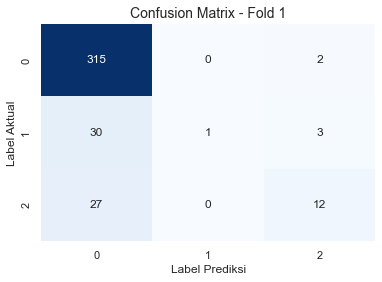


Confusion Matrix Fold 2:
[[310   0   6]
 [ 38   0   1]
 [ 18   1  16]]


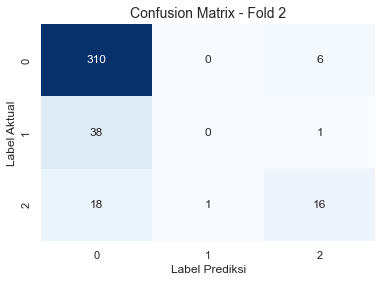


Confusion Matrix Fold 3:
[[310   0   3]
 [ 28   3   3]
 [ 30   1  12]]


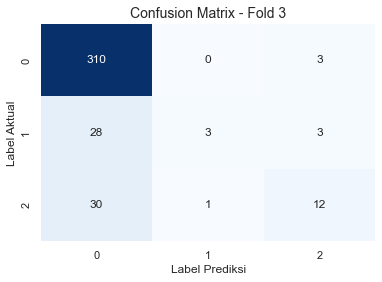


Confusion Matrix Fold 4:
[[300   0   2]
 [ 39   1   3]
 [ 26   0  19]]


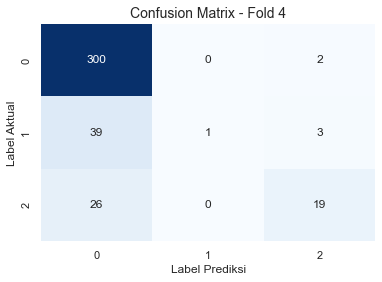


Confusion Matrix Fold 5:
[[312   1   1]
 [ 33   2   2]
 [ 25   0  14]]


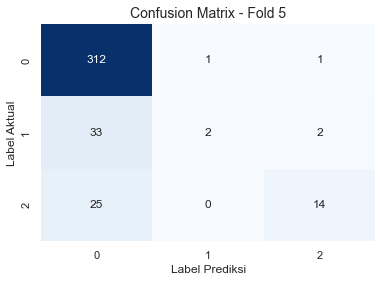


Confusion Matrix Fold 6:
[[310   1   4]
 [ 37   1   0]
 [ 26   0  11]]


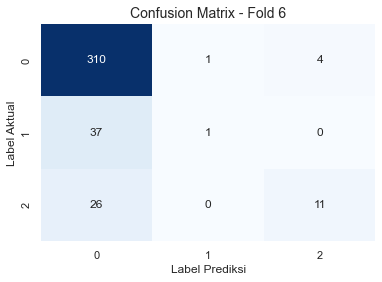


Confusion Matrix Fold 7:
[[300   0   3]
 [ 41   1   3]
 [ 26   0  16]]


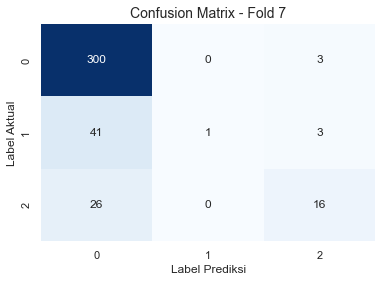


Confusion Matrix Fold 8:
[[322   0   7]
 [ 35   0   3]
 [ 14   0   9]]


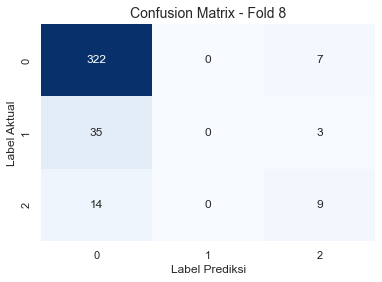


Confusion Matrix Fold 9:
[[299   0   4]
 [ 39   0   1]
 [ 27   1  19]]


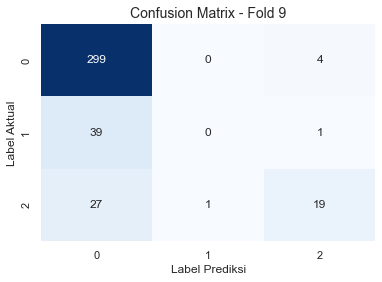


Confusion Matrix Fold 10:
[[302   0   6]
 [ 38   1   3]
 [ 25   1  14]]


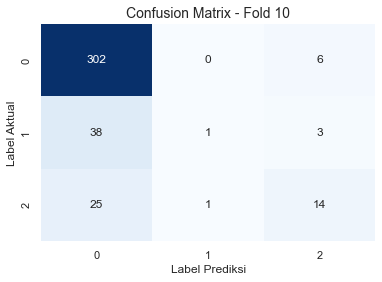


Classication Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.99      0.91       317
      Netral       1.00      0.03      0.06        34
     Positif       0.71      0.31      0.43        39

    accuracy                           0.84       390
   macro avg       0.85      0.44      0.47       390
weighted avg       0.85      0.84      0.79       390


Classication Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91       316
      Netral       0.00      0.00      0.00        39
     Positif       0.70      0.46      0.55        35

    accuracy                           0.84       390
   macro avg       0.51      0.48      0.49       390
weighted avg       0.75      0.84      0.79       390


Classication Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       0.75      0.09      0.1

C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\3282611273.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['label_prediksi_KNN'] = cf_model_knn
C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\3282611273.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unlabel['label_prediksi_KNN'] = unlabel_predictions_knn


Hasil Prediksi KNN telah ditambahkan ke data latih dan data uji.
Data dengan label prediksi telah disimpan ke dalam 'data_hasil_prediksi_KNN2.csv'.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shutil
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Nilai k yang akan diuji
K_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Inisialisasi model KNN
knn_classifier = KNeighborsClassifier(n_neighbors=K_values) 

# Membuat objek StratifiedKFold untuk cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi variabel untuk menyimpan hasil prediksi terbaik
best_knn_classifier = None
best_accuracy = 0  # Untuk menyimpan akurasi terbaik
best_K = None      # Untuk menyimpan nilai K terbaik

# Loop untuk menguji setiap nilai K
for K in K_values:
    print(f"Testing KNN with K values= {K}:")
    # Inisialisasi model KNN dan nilai K tertentu
    knn_classifier = KNeighborsClassifier(n_neighbors=K)
    
    # Inisialisasi list untuk menyimpan metrik evaluasi dari masing-masing fold
    all_fold_predictions = []
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1_scores = []
    confusion_matrices = []
    report_classifications = []
    models = []
    models_per_K = []

    # Loop untuk melakukan cross-validation dan menghitung metrik evaluasi
    for i, (train_index, test_index) in enumerate(cv.split(X_label_tfidf, y)):
        X_train_fold, X_test_fold = X_label_tfidf[train_index], X_label_tfidf[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        print(X_train_fold.shape, X_test_fold.shape, y_train_fold.shape, y_test_fold.shape)

        # Melatih model pada fold saat ini
        knn_classifier.fit(X_train_fold, y_train_fold)

        # Memprediksi label pada fold saat ini
        y_pred_fold = knn_classifier.predict(X_test_fold)
        
        # Save model per fold
        model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_KNN\\models_per_K\\knn_model_K_{K}_fold_{i}.joblib'
        joblib.dump(knn_classifier, model_filename)
        models_per_K.append(model_filename)

        # Menghitung metrik evaluasi untuk fold saat ini
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
        recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
        f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
        conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
        class_report = classification_report(y_test_fold, y_pred_fold)

        # Menyimpan metrik evaluasi dalam list
        fold_accuracies.append(accuracy)
        fold_precisions.append(precision)
        fold_recalls.append(recall)
        fold_f1_scores.append(f1)
        confusion_matrices.append(conf_matrix)
        report_classifications.append(class_report)

    # Cetak hasil akurasi, presisi, recall, dan F1-score untuk masing-masing fold
    for i in range(10):
        print(f"Cross Validation Fold {i+1}:")
        print(f'Accuracy: {fold_accuracies[i] * 100:.2f}%')
        print(f'Precision: {fold_precisions[i] * 100:.2f}%')
        print(f'Recall: {fold_recalls[i] * 100:.2f}%')
        print(f'F1-Score: {fold_f1_scores[i] * 100:.2f}%')
        print()
    
    # Menampilkan confusion matrix dari setiap fold
    for i, cm in enumerate(confusion_matrices):
        print(f"Confusion Matrix Fold {i+1}:")
        print(cm)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - Fold {i+1}', fontsize=14)
        plt.xlabel('Label Prediksi', fontsize=12)
        plt.ylabel('Label Aktual', fontsize=12)
        plt.show()
        print()
    
    # Menampilkan classifcation report dari setiap fold
    for i, cr in enumerate(report_classifications):
        print(f"Classication Report Fold {i+1}:")
        print(cr)
        print()

    # Cetak rata-rata metrik evaluasi dari semua fold
    mean_accuracy = sum(fold_accuracies) / 10 * 100
    mean_precision = sum(fold_precisions) / 10 * 100
    mean_recall = sum(fold_recalls) / 10 * 100
    mean_f1 = sum(fold_f1_scores) / 10 * 100

    print("===========================================")
    print(f"Rata-rata metrik evaluasi pada dari semua fold pada Nilai K = {K}:")
    print(f'Accuracy: {mean_accuracy:.2f}%')
    print(f'Precision: {mean_precision:.2f}%')
    print(f'Recall: {mean_recall:.2f}%')
    print(f'F1-Score: {mean_f1:.2f}%')
    print("===========================================")
    print()
    
    # Memeriksa apakah akurasi saat ini lebih baik daripada yang sebelumnya
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_K = K
        best_models = models  # Menyimpan nama file model dari setiap fold yang dianggap terbaik
        best_knn_classifier = knn_classifier
        all_fold_predictions.extend(y_pred_fold)

# Setelah loop selesai, best_K akan berisi nilai K terbaik
print(f"Best K: {best_K}")

# Prediksi label untuk data latih dan data uji dengan model terbaik
# best_knn_classifier.fit(X_label_tfidf, y)
label_predictions_knn = best_knn_classifier.predict(X_label_tfidf)
cf_model_knn = cross_val_predict(best_knn_classifier, X_label_tfidf, y, cv=cv)
unlabel_predictions_knn = best_knn_classifier.predict(X_unlabel_tfidf)

# Save best model
best_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_KNN\\best_knn_model.joblib'
joblib.dump(best_knn_classifier, best_model_filename)
print(f"Best model saved to: {best_model_filename}")

# Save all models
for i, model_filename in enumerate(best_models):
    new_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_KNN\\best_knn_model_fold_{i}.joblib'
    shutil.copy(model_filename, new_model_filename)
    print(f"Model {i} saved to: {new_model_filename}")

# Menambahkan kolom label prediksi ke dataset data latih dan data uji
data_label['label_prediksi_KNN'] = cf_model_knn
data_unlabel['label_prediksi_KNN'] = unlabel_predictions_knn

# Menyimpan dataset yang telah diperbarui ke dalam satu file CSV
data_hasil_prediksi_KNN = pd.concat([data_label, data_unlabel])
data_hasil_prediksi_KNN.to_csv('data_hasil_prediksi_KNN.csv', index=False)
print("Hasil Prediksi KNN telah ditambahkan ke data latih dan data uji.")
print("Data dengan label prediksi telah disimpan ke dalam 'data_hasil_prediksi_KNN2.csv'.")

Confusion Matrix Hasil Prediksi KNN:
[[3058   27   35]
 [ 325   48   17]
 [ 224    8  158]]


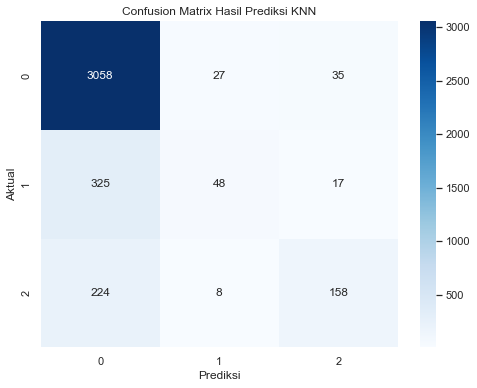

Classification Report Hasil Prediksi KNN:
              precision    recall  f1-score   support

     Negatif       0.85      0.98      0.91      3120
      Netral       0.58      0.12      0.20       390
     Positif       0.75      0.41      0.53       390

    accuracy                           0.84      3900
   macro avg       0.73      0.50      0.55      3900
weighted avg       0.81      0.84      0.80      3900



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, label_predictions_knn)

# Menampilkan confusion matrix
print("Confusion Matrix Hasil Prediksi KNN:")
print(conf_matrix)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Hasil Prediksi KNN')
plt.show()

# Menghitung classification report
class_report = classification_report(y, label_predictions_knn)

# Menampilkan classification report
print("Classification Report Hasil Prediksi KNN:")
print(class_report)

Confusion Matrix Model KNN:
[[3067   16   37]
 [ 339   28   23]
 [ 235    5  150]]


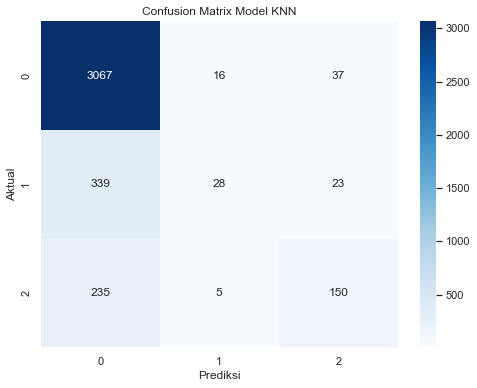

Classification Report Model KNN:
              precision    recall  f1-score   support

     Negatif       0.84      0.98      0.91      3120
      Netral       0.57      0.07      0.13       390
     Positif       0.71      0.38      0.50       390

    accuracy                           0.83      3900
   macro avg       0.71      0.48      0.51      3900
weighted avg       0.80      0.83      0.79      3900



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cf_model_knn)

# Menampilkan confusion matrix
print("Confusion Matrix Model KNN:")
print(conf_matrix)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model KNN')
plt.show()

# Menghitung classification report
class_report = classification_report(y, cf_model_knn)

# Menampilkan classification report
print("Classification Report Model KNN:")
print(class_report)

IMPLEMENTASI ENSEMBLE KNN-SVM

(3510, 2642) (390, 2642) (3510,) (390,)
Model 1 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble\ensemble_model_fold_0.joblib
Cross Validation Fold 1:
Accuracy: 84.62%
Precision: 86.50%
Recall: 84.62%
F1-Score: 79.64%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 2 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble\ensemble_model_fold_1.joblib
Cross Validation Fold 2:
Accuracy: 83.85%
Precision: 84.94%
Recall: 83.85%
F1-Score: 78.86%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 3 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble\ensemble_model_fold_2.joblib
Cross Validation Fold 3:
Accuracy: 83.85%
Precision: 82.89%
Recall: 83.85%
F1-Score: 79.47%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 4 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble\ensemble_model_fold_3.joblib
Cross Val

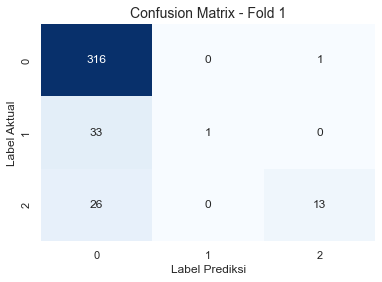


Confusion Matrix Fold 2:
[[312   0   4]
 [ 37   1   1]
 [ 21   0  14]]


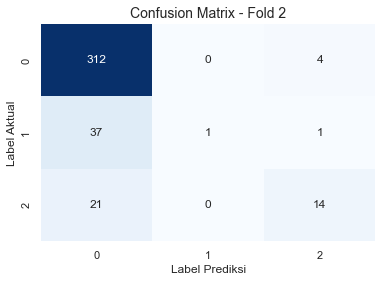


Confusion Matrix Fold 3:
[[311   0   2]
 [ 28   4   2]
 [ 30   1  12]]


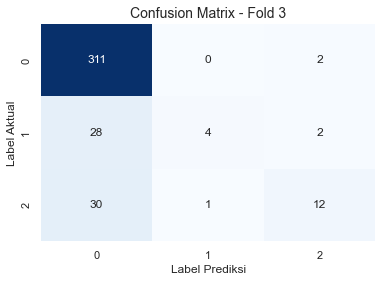


Confusion Matrix Fold 4:
[[301   0   1]
 [ 39   2   2]
 [ 26   1  18]]


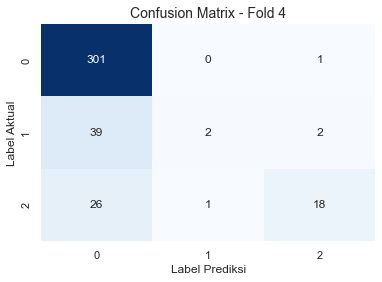


Confusion Matrix Fold 5:
[[313   1   0]
 [ 32   3   2]
 [ 28   1  10]]


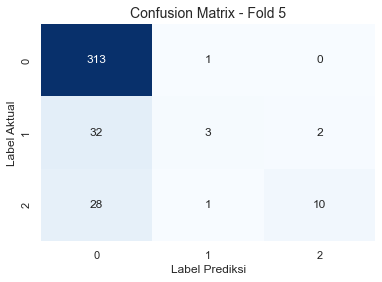


Confusion Matrix Fold 6:
[[312   1   2]
 [ 36   2   0]
 [ 24   0  13]]


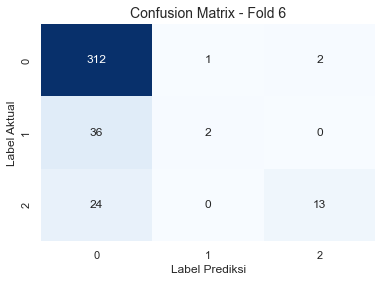


Confusion Matrix Fold 7:
[[302   0   1]
 [ 41   3   1]
 [ 27   0  15]]


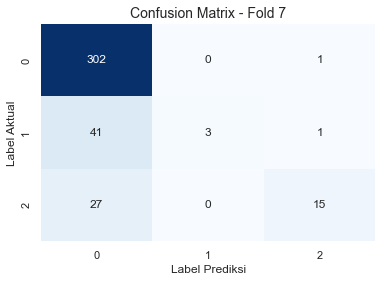


Confusion Matrix Fold 8:
[[326   1   2]
 [ 36   1   1]
 [ 15   0   8]]


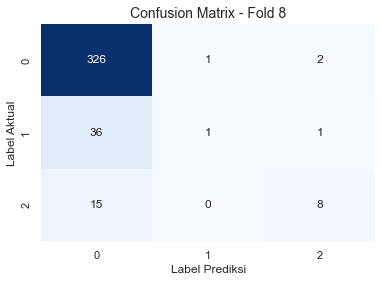


Confusion Matrix Fold 9:
[[301   0   2]
 [ 36   3   1]
 [ 31   3  13]]


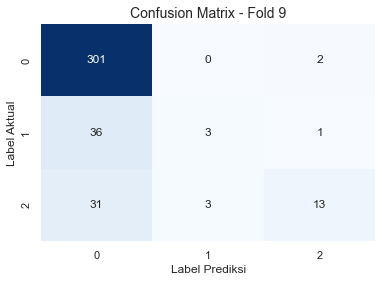


Confusion Matrix Fold 10:
[[302   1   5]
 [ 39   1   2]
 [ 25   1  14]]


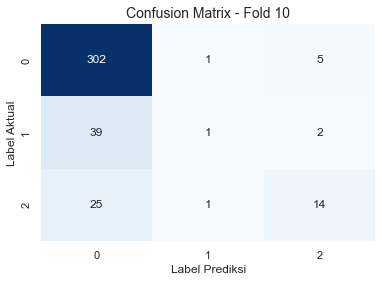


Classification Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.84      1.00      0.91       317
      Netral       1.00      0.03      0.06        34
     Positif       0.93      0.33      0.49        39

    accuracy                           0.85       390
   macro avg       0.92      0.45      0.49       390
weighted avg       0.86      0.85      0.80       390


Classification Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       316
      Netral       1.00      0.03      0.05        39
     Positif       0.74      0.40      0.52        35

    accuracy                           0.84       390
   macro avg       0.86      0.47      0.49       390
weighted avg       0.85      0.84      0.79       390


Classification Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91       313
      Netral       0.80      0.12   

C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\797651086.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['label_prediksi_Ensemble_KNNSVM_Hard'] = cf_model_ensemble_majority
C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\797651086.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unlabel['label_prediksi_Ensemble_KNNSVM_Hard'] = unlabel_predictions_ensemble_majority


Hasil prediksi label untuk data latih dan data uji telah disimpan dalam satu file CSV.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shutil
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

# Membuat ensemble model dengan VotingClassifier
ensemble_classifier_majority = VotingClassifier(estimators=[
    ('knn', best_knn_classifier),
    ('svm', best_svm_classifier)
], voting='hard')  # 'hard' voting mengambil mayoritas suara

# Membuat objek KFold untuk cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi list untuk menyimpan metrik evaluasi dari masing-masing fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
confusion_matrices = []
report_classifications = []
models = []

# Loop untuk melakukan cross-validation dan menghitung metrik evaluasi
for i, (train_index, test_index) in enumerate(cv.split(X_label_tfidf, y)):
    X_train_fold, X_test_fold = X_label_tfidf[train_index], X_label_tfidf[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, y_train_fold.shape, y_test_fold.shape)

    # Melatih ensemble model pada fold saat ini
    ensemble_classifier_majority.fit(X_train_fold, y_train_fold)

    # Memprediksi label pada fold saat ini
    y_pred_fold = ensemble_classifier_majority.predict(X_test_fold)
    
    # Save model per fold
    model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_Ensemble\\ensemble_model_fold_{i}.joblib'
    joblib.dump(ensemble_classifier_majority, model_filename)
    models.append(model_filename)
    print(f"Model {i+1} saved to: {model_filename}")

    # Menghitung metrik evaluasi untuk fold saat ini
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    class_report = classification_report(y_test_fold, y_pred_fold)

    # Menyimpan metrik evaluasi dalam list
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)
    confusion_matrices.append(conf_matrix)
    report_classifications.append(class_report)

    # Menampilkan hasil akurasi, presisi, recall, dan F1-score untuk fold saat ini
    print(f"Cross Validation Fold {i+1}:")
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-Score: {f1 * 100:.2f}%')
    print()

# Menampilkan confusion matrix untuk masing-masing fold
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion Matrix Fold {i+1}:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}', fontsize=14)
    plt.xlabel('Label Prediksi', fontsize=12)
    plt.ylabel('Label Aktual', fontsize=12)
    plt.show()
    print()

# Menampilkan classification report untuk masing-masing fold
for i, cr in enumerate(report_classifications):
    print(f"Classification Report Fold {i+1}:")
    print(cr)
    print()

# Menghitung rata-rata akurasi dari semua fold
mean_accuracy = sum(fold_accuracies) / 10
mean_precision = sum(fold_precisions) / 10
mean_recall = sum(fold_recalls) / 10
mean_f1 = sum(fold_f1_scores) / 10

print("Rata-rata Metrik Evaluasi dari Semua Cross Validation:")
print(f'Accuracy: {mean_accuracy * 100:.2f}%')
print(f'Precision: {mean_precision * 100:.2f}%')
print(f'Recall: {mean_recall * 100:.2f}%')
print(f'F1-Score: {mean_f1 * 100:.2f}%')

# Memprediksi label untuk data latih dan data uji
# ensemble_classifier_majority.fit(X_label_tfidf, y)
label_predictions_ensemble_majority = ensemble_classifier_majority.predict(X_label_tfidf)
cf_model_ensemble_majority = cross_val_predict(ensemble_classifier_majority, X_label_tfidf, y, cv=cv)
unlabel_predictions_ensemble_majority = ensemble_classifier_majority.predict(X_unlabel_tfidf)

best_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_Ensemble\\best_ensemble_majority_model.joblib'
joblib.dump(ensemble_classifier_majority, best_model_filename)
print(f"Best model saved to: {best_model_filename}")

# Menyimpan hasil prediksi label data latih dan data uji ke dalam DataFrame
data_label['label_prediksi_Ensemble_KNNSVM_Hard'] = cf_model_ensemble_majority
data_unlabel['label_prediksi_Ensemble_KNNSVM_Hard'] = unlabel_predictions_ensemble_majority

# Menggabungkan DataFrame data_label dan data_uji menjadi satu DataFrame
data_gabungan = pd.concat([data_label, data_unlabel], ignore_index=True)

# Menyimpan hasil prediksi data latih dan data uji dalam satu file CSV
data_gabungan.to_csv('Hasil_Prediksi_Data_Ensemble_KNNSVM_Hard.csv', index=False)
print("Hasil prediksi label untuk data latih dan data uji telah disimpan dalam satu file CSV.")

Confusion Matrix Hasil Prediksi Ensemble Majority Vote:
[[3112    3    5]
 [ 330   58    2]
 [ 225    8  157]]


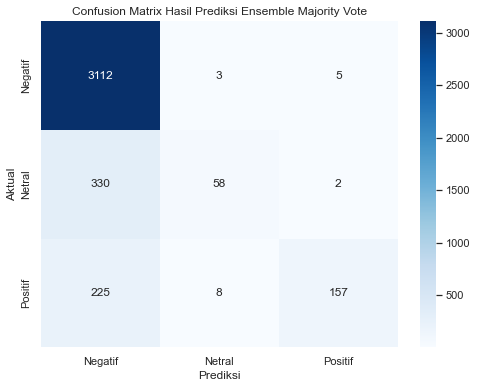

Classification Report Hasil Prediksi Ensemble Majority Vote:
              precision    recall  f1-score   support

     Negatif       0.85      1.00      0.92      3120
      Netral       0.84      0.15      0.25       390
     Positif       0.96      0.40      0.57       390

    accuracy                           0.85      3900
   macro avg       0.88      0.52      0.58      3900
weighted avg       0.86      0.85      0.82      3900



In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, label_predictions_ensemble_majority)

# Menampilkan confusion matrix
print("Confusion Matrix Hasil Prediksi Ensemble Majority Vote:")
print(conf_matrix)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=ensemble_classifier_majority.classes_, 
            yticklabels=ensemble_classifier_majority.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Hasil Prediksi Ensemble Majority Vote')
plt.show()

# Menghitung classification report
class_report = classification_report(y, label_predictions_ensemble_majority)

# Menampilkan classification report
print("Classification Report Hasil Prediksi Ensemble Majority Vote:")
print(class_report)

Confusion Matrix Hasil Model Ensemble Majority Vote:
[[3096    4   20]
 [ 357   21   12]
 [ 253    7  130]]


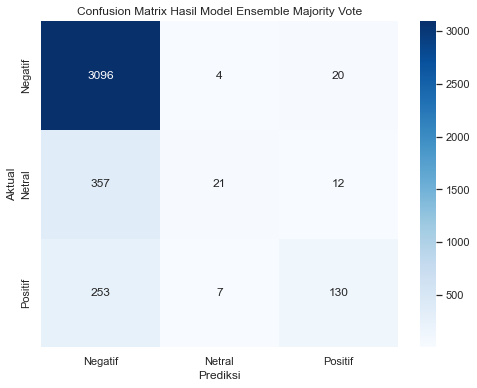

Classification Report Hasil Model Ensemble Majority Vote:
              precision    recall  f1-score   support

     Negatif       0.84      0.99      0.91      3120
      Netral       0.66      0.05      0.10       390
     Positif       0.80      0.33      0.47       390

    accuracy                           0.83      3900
   macro avg       0.76      0.46      0.49      3900
weighted avg       0.81      0.83      0.78      3900



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cf_model_ensemble_majority)

# Menampilkan confusion matrix
print("Confusion Matrix Hasil Model Ensemble Majority Vote:")
print(conf_matrix)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=ensemble_classifier_majority.classes_, 
            yticklabels=ensemble_classifier_majority.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Hasil Model Ensemble Majority Vote')
plt.show()

# Menghitung classification report
class_report = classification_report(y, cf_model_ensemble_majority)

# Menampilkan classification report
print("Classification Report Hasil Model Ensemble Majority Vote:")
print(class_report)

ENSEMBLE AVERAGE

(3510, 2642) (390, 2642) (3510,) (390,)
Model 1 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble_Average\ensemble_average_model_fold_0.joblib
Cross Validation Fold 1:
Accuracy: 85.13%
Precision: 82.60%
Recall: 85.13%
F1-Score: 81.05%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 2 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble_Average\ensemble_average_model_fold_1.joblib
Cross Validation Fold 2:
Accuracy: 84.10%
Precision: 78.85%
Recall: 84.10%
F1-Score: 80.57%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 3 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model_Ensemble_Average\ensemble_average_model_fold_2.joblib
Cross Validation Fold 3:
Accuracy: 85.13%
Precision: 85.63%
Recall: 85.13%
F1-Score: 81.88%

(3510, 2642) (390, 2642) (3510,) (390,)
Model 4 saved to: C:\Users\MFarchanF\Documents\Mata Kuliah\Semester 7\Skripsi\JupyterLab\Test_Model

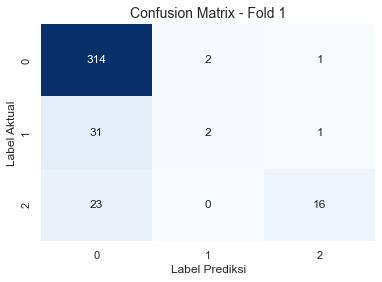


Confusion Matrix Fold 2:
[[307   4   5]
 [ 35   2   2]
 [ 13   3  19]]


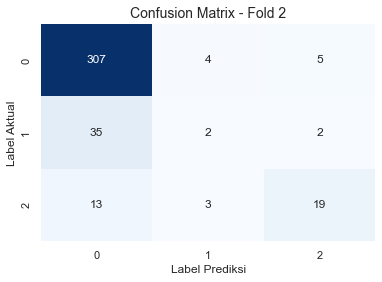


Confusion Matrix Fold 3:
[[308   0   5]
 [ 27   5   2]
 [ 24   0  19]]


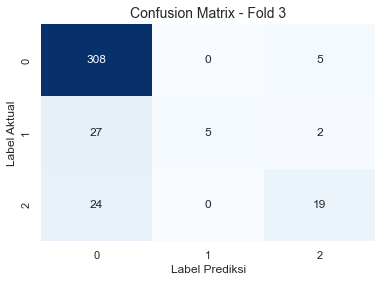


Confusion Matrix Fold 4:
[[301   0   1]
 [ 37   3   3]
 [ 14   0  31]]


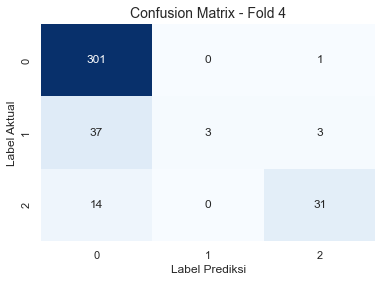


Confusion Matrix Fold 5:
[[312   2   0]
 [ 31   2   4]
 [ 24   0  15]]


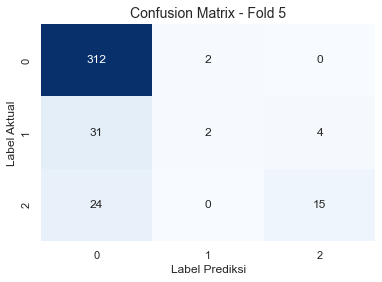


Confusion Matrix Fold 6:
[[308   1   6]
 [ 34   4   0]
 [ 18   0  19]]


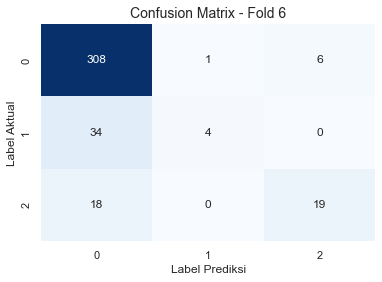


Confusion Matrix Fold 7:
[[299   1   3]
 [ 35   8   2]
 [ 19   0  23]]


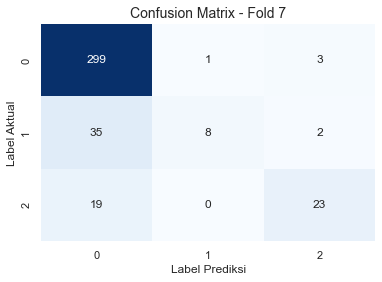


Confusion Matrix Fold 8:
[[321   1   7]
 [ 34   2   2]
 [  9   0  14]]


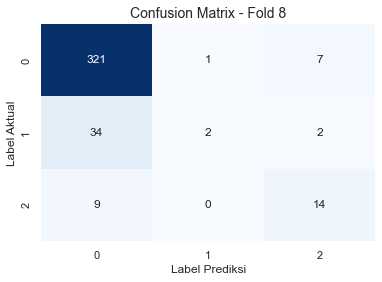


Confusion Matrix Fold 9:
[[297   2   4]
 [ 34   4   2]
 [ 18   2  27]]


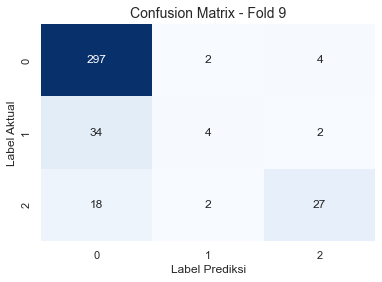


Confusion Matrix Fold 10:
[[300   2   6]
 [ 37   2   3]
 [ 16   1  23]]


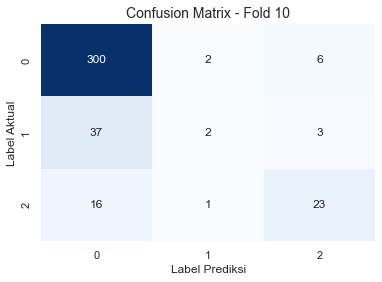


Classification Report Fold 1:
              precision    recall  f1-score   support

     Negatif       0.85      0.99      0.92       317
      Netral       0.50      0.06      0.11        34
     Positif       0.89      0.41      0.56        39

    accuracy                           0.85       390
   macro avg       0.75      0.49      0.53       390
weighted avg       0.83      0.85      0.81       390


Classification Report Fold 2:
              precision    recall  f1-score   support

     Negatif       0.86      0.97      0.92       316
      Netral       0.22      0.05      0.08        39
     Positif       0.73      0.54      0.62        35

    accuracy                           0.84       390
   macro avg       0.61      0.52      0.54       390
weighted avg       0.79      0.84      0.81       390


Classification Report Fold 3:
              precision    recall  f1-score   support

     Negatif       0.86      0.98      0.92       313
      Netral       1.00      0.15   

C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\1281529321.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['label_prediksi_Ensemble_KNNSVM_Soft'] = cf_model_ensemble_average
C:\Users\MFarchanF\AppData\Local\Temp\ipykernel_6704\1281529321.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unlabel['label_prediksi_Ensemble_KNNSVM_Soft'] = unlabel_predictions_ensemble_average


Hasil prediksi label untuk data latih dan data uji telah disimpan dalam satu file CSV.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shutil
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

# Membuat ensemble model dengan VotingClassifier
ensemble_classifier_average = VotingClassifier(estimators=[
    ('knn', best_knn_classifier),
    ('svm', SVC(kernel='rbf', gamma='scale', C=best_C, probability=True, random_state=42))
], voting='soft', weights=[1,1])  # Menggunakan 'soft' voting untuk average

# Membuat objek KFold untuk cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi list untuk menyimpan metrik evaluasi dari masing-masing fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
confusion_matrices = []
report_classifications = []
models = []

# Loop untuk melakukan cross-validation dan menghitung metrik evaluasi
for i, (train_index, test_index) in enumerate(cv.split(X_label_tfidf, y)):
    X_train_fold, X_test_fold = X_label_tfidf[train_index], X_label_tfidf[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, y_train_fold.shape, y_test_fold.shape)

    # Melatih ensemble model pada fold saat ini
    ensemble_classifier_average.fit(X_train_fold, y_train_fold)

    # Memprediksi label pada fold saat ini
    y_pred_fold = ensemble_classifier_average.predict(X_test_fold)
    
    # Save model per fold
    model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_Ensemble_Average\\ensemble_average_model_fold_{i}.joblib'
    joblib.dump(ensemble_classifier_average, model_filename)
    models.append(model_filename)
    print(f"Model {i+1} saved to: {model_filename}")

    # Menghitung metrik evaluasi untuk fold saat ini
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    class_report = classification_report(y_test_fold, y_pred_fold)

    # Menyimpan metrik evaluasi dalam list
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)
    confusion_matrices.append(conf_matrix)
    report_classifications.append(class_report)

    # Menampilkan hasil akurasi, presisi, recall, dan F1-score untuk fold saat ini
    print(f"Cross Validation Fold {i+1}:")
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1-Score: {f1 * 100:.2f}%')
    print()

# Menampilkan confusion matrix untuk masing-masing fold
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion Matrix Fold {i+1}:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}', fontsize=14)
    plt.xlabel('Label Prediksi', fontsize=12)
    plt.ylabel('Label Aktual', fontsize=12)
    plt.show()
    print()

# Menampilkan classification report untuk masing-masing fold
for i, cr in enumerate(report_classifications):
    print(f"Classification Report Fold {i+1}:")
    print(cr)
    print()

# Menghitung rata-rata akurasi dari semua fold
mean_accuracy = sum(fold_accuracies) / 10
mean_precision = sum(fold_precisions) / 10
mean_recall = sum(fold_recalls) / 10
mean_f1 = sum(fold_f1_scores) / 10

print("Rata-rata Metrik Evaluasi dari Semua Cross Validation:")
print(f'Accuracy: {mean_accuracy * 100:.2f}%')
print(f'Precision: {mean_precision * 100:.2f}%')
print(f'Recall: {mean_recall * 100:.2f}%')
print(f'F1-Score: {mean_f1 * 100:.2f}%')

# Memprediksi label untuk data latih dan data uji
# ensemble_classifier_average.fit(X_label_tfidf, y)
label_predictions_ensemble_average = ensemble_classifier_average.predict(X_label_tfidf)
cf_model_ensemble_average = cross_val_predict(ensemble_classifier_average, X_label_tfidf, y, cv=cv)
unlabel_predictions_ensemble_average = ensemble_classifier_average.predict(X_unlabel_tfidf)

best_model_filename = f'C:\\Users\\MFarchanF\\Documents\\Mata Kuliah\\Semester 7\\Skripsi\\JupyterLab\\Test_Model_Ensemble_Average\\best_ensemble_average_model.joblib'
joblib.dump(ensemble_classifier_average, best_model_filename)
print(f"Best model saved to: {best_model_filename}")

# Menyimpan hasil prediksi label data latih dan data uji ke dalam DataFrame
data_label['label_prediksi_Ensemble_KNNSVM_Soft'] = cf_model_ensemble_average
data_unlabel['label_prediksi_Ensemble_KNNSVM_Soft'] = unlabel_predictions_ensemble_average

# Menggabungkan DataFrame data_label dan data_uji menjadi satu DataFrame
data_gabungan = pd.concat([data_label, data_unlabel], ignore_index=True)

# Menyimpan hasil prediksi data latih dan data uji dalam satu file CSV
data_gabungan.to_csv('Hasil_Prediksi_Data_Ensemble_KNNSVM_Soft.csv', index=False)
print("Hasil prediksi label untuk data latih dan data uji telah disimpan dalam satu file CSV.")

Confusion Matrix Hasil Prediksi Ensemble Average:
[[3108    6    6]
 [ 175  209    6]
 [  16    3  371]]


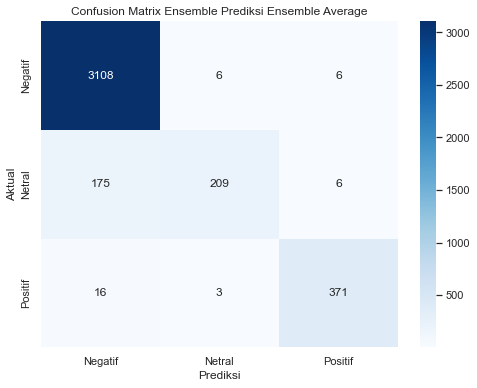

Classification Report Prediksi Ensemble Average:
              precision    recall  f1-score   support

     Negatif       0.94      1.00      0.97      3120
      Netral       0.96      0.54      0.69       390
     Positif       0.97      0.95      0.96       390

    accuracy                           0.95      3900
   macro avg       0.96      0.83      0.87      3900
weighted avg       0.95      0.95      0.94      3900



In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, label_predictions_ensemble_average)

# Menampilkan confusion matrix
print("Confusion Matrix Hasil Prediksi Ensemble Average:")
print(conf_matrix)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=ensemble_classifier_average.classes_, 
            yticklabels=ensemble_classifier_average.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Ensemble Prediksi Ensemble Average')
plt.show()

# Menghitung classification report
class_report = classification_report(y, label_predictions_ensemble_average)

# Menampilkan classification report
print("Classification Report Prediksi Ensemble Average:")
print(class_report)

Confusion Matrix Model Ensemble Average:
[[3067   15   38]
 [ 335   34   21]
 [ 178    6  206]]


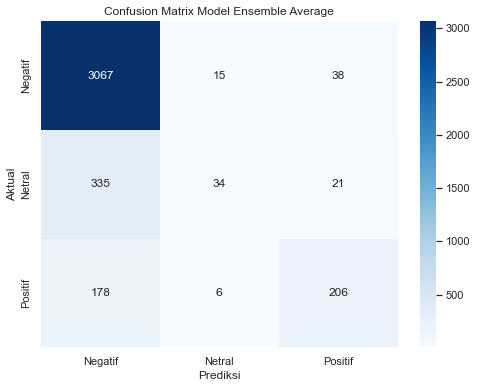

Classification Report Model Ensemble Average:
              precision    recall  f1-score   support

     Negatif       0.86      0.98      0.92      3120
      Netral       0.62      0.09      0.15       390
     Positif       0.78      0.53      0.63       390

    accuracy                           0.85      3900
   macro avg       0.75      0.53      0.57      3900
weighted avg       0.82      0.85      0.81      3900



In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y, cf_model_ensemble_average)

# Menampilkan confusion matrix
print("Confusion Matrix Model Ensemble Average:")
print(conf_matrix)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=ensemble_classifier_average.classes_, 
            yticklabels=ensemble_classifier_average.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Model Ensemble Average')
plt.show()

# Menghitung classification report
class_report = classification_report(y, cf_model_ensemble_average)

# Menampilkan classification report
print("Classification Report Model Ensemble Average:")
print(class_report)

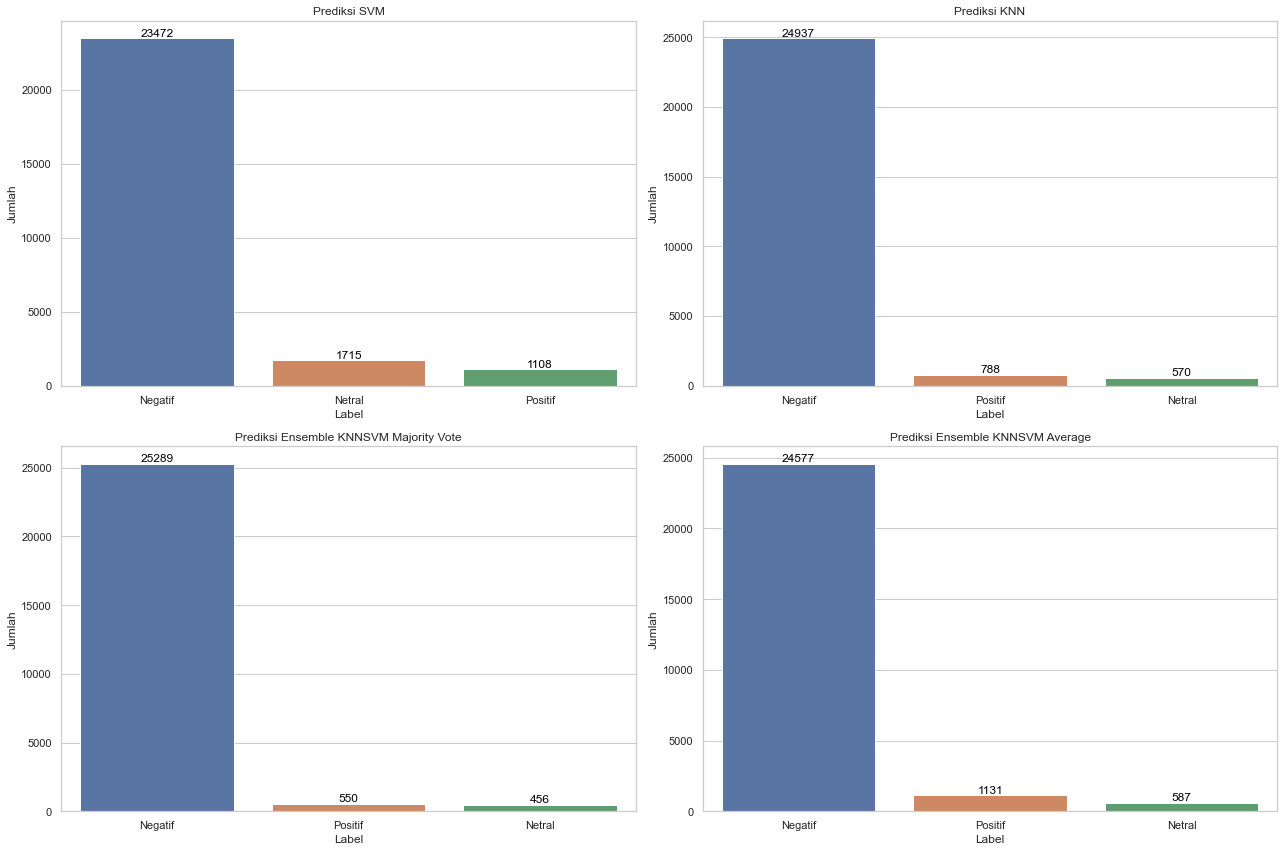

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari file CSV
data = pd.read_csv('Hasil_Prediksi_Data_Ensemble_KNNSVM_Soft.csv')

# Menghitung jumlah label prediksi SVM
count_prediksi_SVM = data['label_prediksi_SVM'].value_counts()

# Menghitung jumlah label prediksi KNN
count_prediksi_KNN = data['label_prediksi_KNN'].value_counts()

# Menghitung jumlah label prediksi Ensemble KNNSVM
count_prediksi_Ensemble_KNNSVM_Hard = data['label_prediksi_Ensemble_KNNSVM_Hard'].value_counts()

# Menghitung jumlah label prediksi Ensemble KNNSVM
count_prediksi_Ensemble_KNNSVM_Soft = data['label_prediksi_Ensemble_KNNSVM_Soft'].value_counts()

# Membuat subplots dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Grafik untuk label_prediksi_SVM
sns.barplot(x=count_prediksi_SVM.index, y=count_prediksi_SVM.values, ax=axes[0, 0])
axes[0, 0].set_title('Prediksi SVM')
axes[0, 0].set_xlabel('Label')
axes[0, 0].set_ylabel('Jumlah')

# Menambahkan jumlah angka di atas batang grafik label_prediksi_SVM
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')

# Grafik untuk label_prediksi_KNN
sns.barplot(x=count_prediksi_KNN.index, y=count_prediksi_KNN.values, ax=axes[0, 1])
axes[0, 1].set_title('Prediksi KNN')
axes[0, 1].set_xlabel('Label')
axes[0, 1].set_ylabel('Jumlah')

# Menambahkan jumlah angka di atas batang grafik label_prediksi_KNN
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')

# Grafik untuk label_prediksi_Ensemble_KNNSVM (Hard)
sns.barplot(x=count_prediksi_Ensemble_KNNSVM_Hard.index, y=count_prediksi_Ensemble_KNNSVM_Hard.values, ax=axes[1, 0])
axes[1, 0].set_title('Prediksi Ensemble KNNSVM Majority Vote')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Jumlah')

# Menambahkan jumlah angka di atas batang grafik label_prediksi_Ensemble_KNNSVM (Hard)
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')

# Grafik untuk label_prediksi_Ensemble_KNNSVM (Soft)
sns.barplot(x=count_prediksi_Ensemble_KNNSVM_Soft.index, y=count_prediksi_Ensemble_KNNSVM_Soft.values, ax=axes[1, 1])
axes[1, 1].set_title('Prediksi Ensemble KNNSVM Average')
axes[1, 1].set_xlabel('Label')
axes[1, 1].set_ylabel('Jumlah')

# Menambahkan jumlah angka di atas batang grafik label_prediksi_Ensemble_KNNSVM (Soft)
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.tight_layout()
plt.show()

IMPLEMENTASI DEPLOYMENT

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca data dari file CSV
data = pd.read_csv('Hasil_Prediksi_Data_Ensemble_KNNSVM_Soft.csv')

# Memisahkan data kelas negatif
data_negative = data[data['label_prediksi_Ensemble_KNNSVM_Soft'] == 'Negatif']
data_positive = data[data['label_prediksi_Ensemble_KNNSVM_Soft'] == 'Positif']

# Membuat representasi TF-IDF dari dokumen kelas negatif
tfidf_negative = TfidfVectorizer()
X_negative = data_negative['PreprocessingFinal']
X_tfidf_negative = tfidf_negative.fit_transform(X_negative)

# Membuat representasi TF-IDF dari dokumen kelas negatif
tfidf_positive = TfidfVectorizer()
X_positive = data_positive['PreprocessingFinal']
X_tfidf_positive = tfidf_positive.fit_transform(X_positive)

# Mengambil fitur kata dari TF-IDF
features_negative = tfidf_negative.get_feature_names_out()
features_positive = tfidf_positive.get_feature_names_out()

# Membuat DataFrame dari vektor TF-IDF
df_negative = pd.DataFrame(X_tfidf_negative.toarray(), columns=features_negative)
df_positive = pd.DataFrame(X_tfidf_positive.toarray(), columns=features_positive)

# Menghitung jumlah kemunculan kata pada kelas negatif
df_sum_negative = df_negative.sum(axis=0)
df_sum_positive = df_positive.sum(axis=0)

# Mengurutkan kata-kata berdasarkan frekuensi kemunculan
df_sum_sorted_negative = df_sum_negative.sort_values(ascending=False)
df_sum_sorted_positive = df_sum_positive.sort_values(ascending=False)

# Menyimpan hasil ke dalam file CSV
df_sum_sorted_negative.to_csv('tfidf_negative_sorted.csv')
df_sum_sorted_positive.to_csv('tfidf_positive_sorted.csv')

# Menampilkan hasil perhitungan TF-IDF yang sudah diurutkan
print("Hasil perhitungan TF-IDF kelas negatif yang sudah diurutkan:")
print(df_sum_sorted_negative)
print()

# Menampilkan hasil perhitungan TF-IDF yang sudah diurutkan
print("Hasil perhitungan TF-IDF kelas Positif yang sudah diurutkan:")
print(df_sum_sorted_positive)

Hasil perhitungan TF-IDF kelas negatif yang sudah diurutkan:
telkomsel    2546.119949
sinyal       2487.247662
jaring       1985.419735
jelek        1401.967338
hilang        880.323152
                ...     
gegap           0.199720
gempita         0.199720
katibung        0.189666
teguh           0.189666
china           0.189437
Length: 7033, dtype: float64

Hasil perhitungan TF-IDF kelas Positif yang sudah diurutkan:
telkomsel     132.425926
sinyal        115.346412
jaring        109.202462
bagus         107.880725
lancar         72.944618
                 ...    
presiden        0.241176
sederhana       0.233930
romantis        0.224660
festival        0.224660
flowerlove      0.224660
Length: 1330, dtype: float64


VISUALISASI WORDCLOUD

In [42]:
# Fungsi untuk membagi kata-kata dalam ulasan
def split_word(text):
    return text.split()

In [44]:
# Wordcloud ulasan kata positif

# Filter ulasan positif
positif_review = df[df['label_prediksi_Ensemble_KNNSVM_Soft'] == 'Positif']

# Memisahkan kata-kata dalam ulasan positif
positif_words = positif_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata positif menjadi satu teks
list_words_positif = [word for row_word in positif_words for word in row_word]
list_words_positif = ' '.join(list_words_positif)

# Membuat word cloud dari kata-kata positif
wordcloud_positif = WordCloud(width=800, height=600, background_color='black', colormap='Dark2_r', min_font_size=10).generate(list_words_positif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Positif', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_positif)
ax.axis('off')

plt.tight_layout()
plt.show()

KeyError: 'label_prediksi_Ensemble_KNNSVM_Soft'

In [ ]:
# Wordcloud ulasan kata negatif

# Filter ulasan negatif
negatif_review = df[df['label_prediksi_Ensemble_KNNSVM_Soft'] == 'Negatif']

# Memisahkan kata-kata dalam ulasan negatif
negatif_words = negatif_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata negatif menjadi satu teks
list_words_negatif = [word for row_word in negatif_words for word in row_word]
list_words_negatif = ' '.join(list_words_negatif)

# Membuat word cloud dari kata-kata negatif
wordcloud_negatif = WordCloud(width=800, height=600, background_color='black', colormap='Reds', min_font_size=10).generate(list_words_negatif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Negatif', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_negatif)
ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Wordcloud ulasan kata netral

# Filter ulasan netra;
netral_review = df[df['label_prediksi_Ensemble_KNNSVM_Soft'] == 'Netral']

# Memisahkan kata-kata dalam ulasan netral
netral_words = netral_review['PreprocessingFinal'].apply(split_word)

# Menggabungkan semua kata netral menjadi satu teks
list_words_netral = [word for row_word in netral_words for word in row_word]
list_words_netral = ' '.join(list_words_netral)

# Membuat word cloud dari kata-kata netral
wordcloud_netral = WordCloud(width=800, height=600, background_color='black', colormap='Blues_r', min_font_size=10).generate(list_words_negatif)

# Menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud dari Kata Netral', fontsize=14)
ax.grid(False)
ax.imshow(wordcloud_netral)
ax.axis('off')

plt.tight_layout()
plt.show()